## Libraries - Dependencies and Function Definitions

In [28]:
%run  "./PY_LIBRARIES/data_cleaning_libraries.py" 

In [2]:
%run  "./PY_LIBRARIES/outliers.py"

In [3]:
%run  "./PY_LIBRARIES/missing_values.py"

## Loading csv dataset into pandas dataframe

In [4]:
## load for manual
df = pd.read_csv("Virtual Patient Models_Dataset.csv")

## load for automation
dfA = pd.read_csv("Virtual Patient Models_Dataset.csv")

## load_data custom function
#dfA = pd.DataFrame(load_data("/content/drive/MyDrive/MAIO/projecto/PMI/Virtual Patient Models_Dataset2.csv"))

# ***1. Analysis of the loaded dataset*** (->df)

## 1.1. Description and data types

The dataset is a collection of aggregated clinical parameters for the participants (such as clinical scores), parameters extracted from the utilized devices (such as average heart rate per day, average gait speed etc.), and coupled events about them (such as falls, loss of orientation etc.). It contains information which was collected during the clinical evaluation of the older people from medical experts.This information represents the clinical status of the older person across different domains, e.g. physical, psychological, cognitive etc.

The dataset contains several medical features which are used by clinicians to assess the overall state of the older people.

The purpose of the Virtual Patient Model is to assess the overall state of the older people based on their medical parameters, and to find associations between these parameters and frailty status.

A list of the recorded clinical parameters and their description is shown below:

- part_id: The user ID, which should be a 4-digit number

- q_date: The recording timestamp, which follows the “YYYY-MM-DDTHH:mm:ss.fffZ” format (eg. 14 September 2017 12:23:34.567, is formatted as 2019-09-14T12:23:34.567Z)

- clinical_visit: As several clinical evaluations were performed to each older adult, this number shows for which clinical evaluation these measurements refer to

- fried: Ordinal categorization of frailty level according to Fried operational definition of frailty

- hospitalization_one_year: Number of nonscheduled hospitalizations in the last year

- hospitalization_three_years: Number of nonscheduled hospitalizations in the last three years

- ortho_hypotension: Presence of orthostatic hypotension

- vision: Visual difficulty (qualitative ordinal evaluation)

- audition: Hearing difficulty (qualitative ordinal evaluation)

- weight_loss: Unintentional weight loss >4.5 kg in the past year (categorical answer)

- exhaustion_score: Self-reported exhaustion (categorical answer)

- raise_chair_time: Time in seconds to perform a lower limb strength clinical test

- balance_single: Single foot station (Balance) (categorical answer)

- gait_get_up: Time in seconds to perform the 3meters’ Timed Get Up And Go Test

- gait_speed_4m: Speed for 4 meters’ straight walk

- gait_optional_binary: Gait optional evaluation (qualitative evaluation by the investigator)

- gait_speed_slower: Slowed walking speed (categorical answer)

- grip_strength_abnormal: Grip strength outside the norms (categorical answer)

- low_physical_activity: Low physical activity (categorical answer)

- falls_one_year: Number of falls in the last year

- fractures_three_years: Number of fractures during the last 3 years

- fried_clinician: Fried’s categorization according to clinician’s estimation (when missing data for answering the Fried’s operational frailty definition questionnaire)

- bmi_score: Body Mass Index (in Kg/m²)

- bmi_body_fat: Body Fat (%)

- waist: Waist circumference (in cm)

- lean_body_mass: Lean Body Mass (%)

- screening_score: Mini Nutritional Assessment (MNA) screening score

- cognitive_total_score: Montreal Cognitive Assessment (MoCA) test score

- memory_complain: Memory complain (categorical answer)

- mmse_total_score: Folstein Mini-Mental State Exam score

- sleep: Reported sleeping problems (qualitative ordinal evaluation)

- depression_total_score: 15-item Geriatric Depression Scale (GDS-15)

- anxiety_perception: Anxiety auto-evaluation (visual analogue scale 0-10)

- living_alone: Living Conditions (categorical answer)

- leisure_out: Leisure activities (number of leisure activities per week)

- leisure_club: Membership of a club (categorical answer)

- social_visits: Number of visits and social interactions per week

- social_calls: Number of telephone calls exchanged per week

- social_phone: Approximate time spent on phone per week

- social_skype: Approximate time spent on videoconference per week

- social_text: Number of written messages (SMS and emails) sent by the participant per week

- house_suitable_participant: Subjective suitability of the housing environment according to participant’s evaluation (categorical answer)

- house_suitable_professional: Subjective suitability of the housing environment according to investigator’s evaluation (categorical answer)

- stairs_number: Number of steps to access house (without possibility to use elevator)

- life_quality: Quality of life self-rating (visual analogue scale 0-10)

- health_rate: Self-rated health status (qualitative ordinal evaluation)

- health_rate_comparison: Self-assessed change since last year (qualitative ordinal evaluation)

- pain_perception: Self-rated pain (visual analogue scale 0-10)

- activity_regular: Regular physical activity (ordinal answer)

- smoking: Smoking (categorical answer)

- alcohol_units: Alcohol Use (average alcohol units consumption per week)

- katz_index: Katz Index of ADL score

- iadl_grade: Instrumental Activities of Daily Living score

- comorbidities_count: Number of comorbidities

- comorbidities_significant_count: Number of comorbidities which affect significantly the person’s functional status

- medication_count: Number of active substances taken on a regular basis

https://zenodo.org/records/2670048#.Y9Y8fNJBwUE

The datasets were loaded into pandas DataFrames.
df was loaded for manual cleaning steps.
dfA was loaded for automated cleaning steps.
Initial analysis included:
Data Description and Data Types: Using df.info() and a custom describe_dataframe_custom_out function to understand the structure, data types, and initial summary statistics, including potential outliers and categorical feature details.
Missing Data Analysis: Identifying columns and rows with missing values and quantifying their extent using df.isna().sum() and df.isna().mean().
Correlation Analysis: Analyzing correlations between numerical features using analyze_numerical and between categorical features using analyze_categorical.
Principal Component Analysis (PCA): Applying PCA to both numerical and categorical features using analyze_numerical_pca and analyze_categorical_pca to understand feature variance and identify potential dimensionality reduction opportunities.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   part_id                          117 non-null    int64  
 1   clinical_visit                   117 non-null    int64  
 2   fried                            117 non-null    object 
 3   gender                           117 non-null    object 
 4   q_date                           117 non-null    object 
 5   age                              117 non-null    int64  
 6   comorbidities_most_important     116 non-null    object 
 7   hospitalization_one_year         117 non-null    int64  
 8   hospitalization_three_years      117 non-null    int64  
 9   ortho_hypotension                117 non-null    object 
 10  vision                           117 non-null    object 
 11  audition                         117 non-null    object 
 12  weight_loss           

In [6]:
summary_dictdf = describe_dataframe_custom_out(df
                                                #, exclude_columns = ['part_id','clinical_visit', 'q_date']
                                               , zscore_threshold = 3.0
                                               , iqr_multiplier = 1.5
                                               , categorical_threshold_unique = 20
                                               , max_unique_ratio_for_categorical = 0.2
                                               #, force_categorical_columns = ['anxiety_perception', 'social_phone', 'life_quality', 'pain_perception']
                                               )


print("Numerical Summary:")
display(summary_dictdf['numerical_summary'])

print("\nCategorical Summary:")
display(summary_dictdf['categorical_summary'])

numerical_featuresdf = summary_dictdf['numerical_features']
categorical_featuresdf = summary_dictdf['categorical_features']

display(numerical_featuresdf)
display(categorical_featuresdf)

Accepting default classifications. No interactive reclassification will occur.
Numerical Summary:


,Column Name,Data Type,Missing Values,Missing %,Min Value,Max Value,Mean,Median,Mode(s),Z-Score Outliers,IQR Outliers
0,part_id,int64,0,0.0%,1084.000000,2584.000000,1596.623932,1104.000000,"1084, 1085, 1086, 1088, 1089, 1090, 1091, 1092...",0,0
1,raise_chair_time,float64,0,0.0%,6.900000,999.000000,53.775043,11.700000,14.0,5,6
2,gait_get_up,float64,0,0.0%,4.000000,999.000000,18.719658,9.050000,"6.0, 9.0",1,7
3,gait_speed_4m,float64,0,0.0%,2.540000,22.800000,6.619915,5.600000,5.0,4,10
4,bmi_score,float64,0,0.0%,22.479339,44.658044,28.664850,27.168115,35.430839,3,9
5,bmi_body_fat,float64,33,28.21%,19.700000,218.000000,30.225000,28.600000,23.2,1,1
6,waist,float64,1,0.85%,82.000000,188.000000,100.956897,97.000000,95.0,1,4
7,lean_body_mass,float64,33,28.21%,-78.706000,76.217500,51.856930,52.517200,"-78.706, 41.3028, 41.4882, 41.72, 41.756, 41.7...",1,3
8,anxiety_perception,float64,0,0.0%,0.000000,10.000000,4.577778,4.000000,1.0,0,0
9,social_phone,int64,0,0.0%,3.000000,2000.000000,292.213675,120.000000,999,1,13



Categorical Summary:


,Column Name,Data Type,Missing Values,Missing %,Unique Values,Mode(s)
0,clinical_visit,int64,0,0.0%,4,"1, 2, 3"
1,fried,object,0,0.0%,3,Pre-frail
2,gender,object,0,0.0%,2,M
3,q_date,object,0,0.0%,101,"2017-11-24T00:00:00.000Z, 2017-11-29T00:00:00...."
4,age,int64,0,0.0%,16,77
5,comorbidities_most_important,object,1,0.85%,4,Non of the above
6,hospitalization_one_year,int64,0,0.0%,3,0
7,hospitalization_three_years,int64,0,0.0%,4,0
8,ortho_hypotension,object,0,0.0%,2,No
9,vision,object,0,0.0%,3,Sees well


['part_id',
 'raise_chair_time',
 'gait_get_up',
 'gait_speed_4m',
 'bmi_score',
 'bmi_body_fat',
 'waist',
 'lean_body_mass',
 'anxiety_perception',
 'social_phone',
 'life_quality',
 'pain_perception']

['clinical_visit',
 'fried',
 'gender',
 'q_date',
 'age',
 'comorbidities_most_important',
 'hospitalization_one_year',
 'hospitalization_three_years',
 'ortho_hypotension',
 'vision',
 'audition',
 'weight_loss',
 'exhaustion_score',
 'balance_single',
 'gait_optional_binary',
 'gait_speed_slower',
 'grip_strength_abnormal',
 'low_physical_activity',
 'falls_one_year',
 'fractures_three_years',
 'screening_score',
 'mna_total',
 'cognitive_total_score',
 'memory_complain',
 'sleep',
 'mmse_total_score',
 'depression_total_score',
 'living_alone',
 'leisure_out',
 'leisure_club',
 'social_visits',
 'social_calls',
 'social_skype',
 'social_text',
 'house_suitable_participant',
 'house_suitable_professional',
 'stairs_number',
 'health_rate',
 'health_rate_comparison',
 'activity_regular',
 'smoking',
 'alcohol_units',
 'katz_index',
 'iadl_grade',
 'comorbidities_count',
 'comorbidities_significant_count',
 'medication_count']

## 1.2. Missing Data (Missing Values)

### 1.2.1. Columns

In [7]:
pd.concat([df.isna().sum() ,round(df.isna().mean() * 100, 1)], axis=1, keys=["count", "%"])[pd.isnull(df).sum() > 0]

,count,%
comorbidities_most_important,1,0.9
bmi_body_fat,33,28.2
waist,1,0.9
lean_body_mass,33,28.2
mna_total,114,97.4
cognitive_total_score,3,2.6
memory_complain,4,3.4
sleep,1,0.9
leisure_club,2,1.7
house_suitable_participant,62,53.0


In [8]:
print("Colunas com missing values: ",  df.isna().sum()[pd.isnull(df).sum() > 0].count())

Colunas com missing values:  13


### 1.2.2. Rows

In [9]:
#get the list of max NaN rows
x = max(df.isnull().sum(axis=1))
#loc indexes to list
y = df.loc[df.isnull().sum(1) == x].index.to_list()
#show
print(df[df.index.isin(y)].to_string())

     part_id  clinical_visit      fried gender                    q_date  age comorbidities_most_important  hospitalization_one_year  hospitalization_three_years ortho_hypotension           vision          audition weight_loss  exhaustion_score  raise_chair_time balance_single  gait_get_up  gait_speed_4m  gait_optional_binary gait_speed_slower grip_strength_abnormal low_physical_activity  falls_one_year  fractures_three_years  bmi_score  bmi_body_fat  waist  lean_body_mass  screening_score  mna_total  cognitive_total_score memory_complain                     sleep  mmse_total_score  depression_total_score  anxiety_perception living_alone  leisure_out leisure_club  social_visits  social_calls  social_phone  social_skype  social_text house_suitable_participant house_suitable_professional  stairs_number  life_quality health_rate health_rate_comparison  pain_perception          activity_regular                                  smoking  alcohol_units  katz_index  iadl_grade  comorbidities_c

In [10]:
print ("Numero de pacientes (linhas) com maior numero de missing values: ",df.loc[df.isnull().sum(1) == x].count().max())

Numero de pacientes (linhas) com maior numero de missing values:  8


In [11]:
print("Maior numero de ocorrencias de missing values num paciente/visita: ", max(df.isnull().sum(axis=1)))

Maior numero de ocorrencias de missing values num paciente/visita:  6


## 1.3. Correlation Analysis

### 1.3.1. Numerical features Analysis

The number of numerical columns being analyzed is: 11


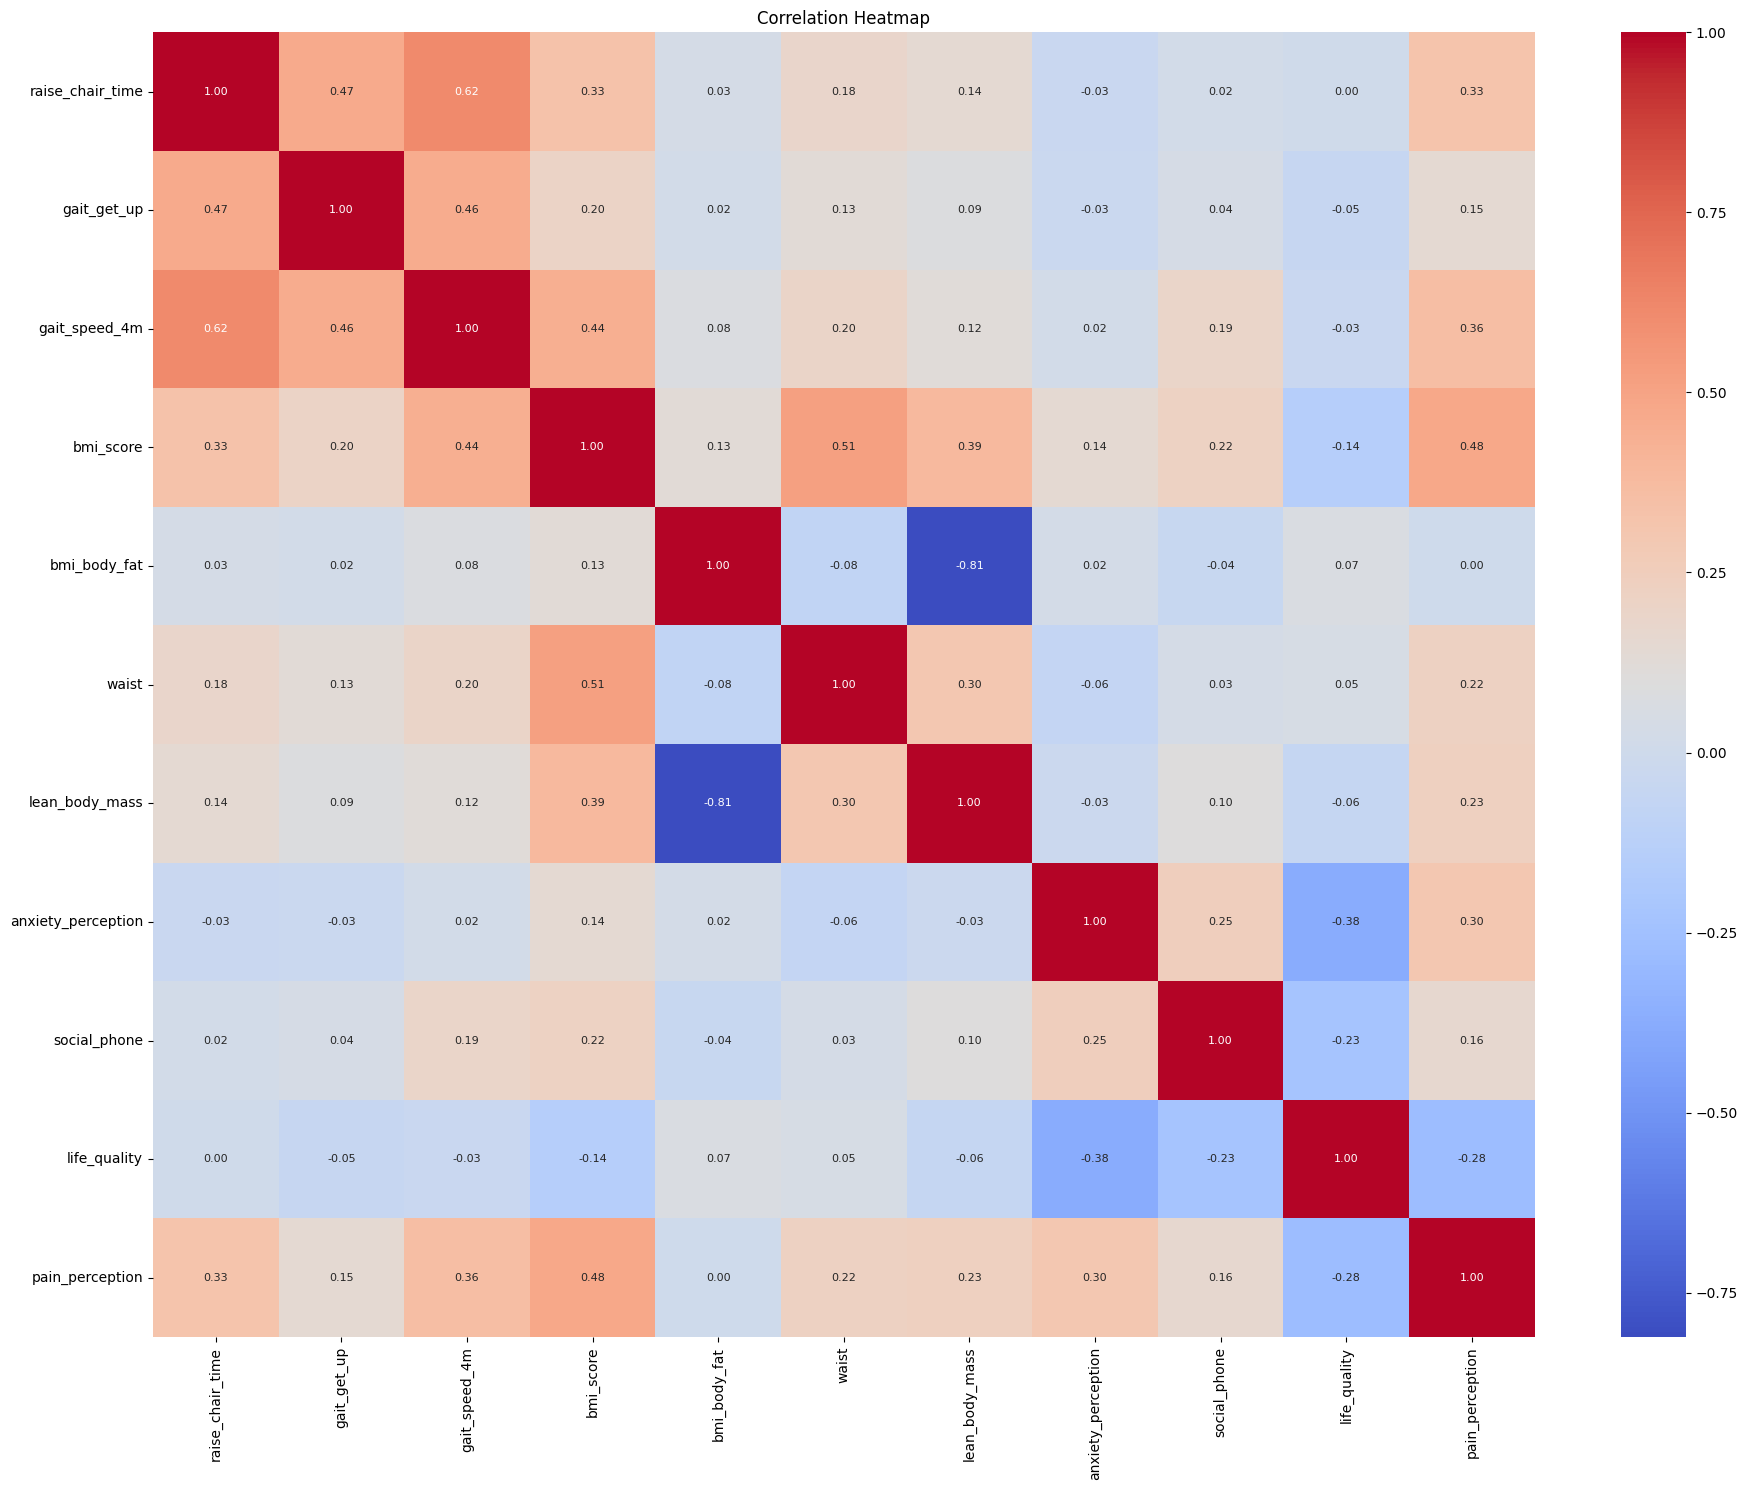

No features found with correlation > 0.95 (excluding self-correlation).


['raise_chair_time',
 'gait_get_up',
 'gait_speed_4m',
 'bmi_score',
 'bmi_body_fat',
 'waist',
 'lean_body_mass',
 'anxiety_perception',
 'social_phone',
 'life_quality',
 'pain_perception']

In [12]:
analyze_numerical(
    df,
    correlation = 0.95,
    numerical_cols_to_exclude=['part_id','clinical_visit', 'age']
    ,numerical_features= numerical_featuresdf
)

### 1.3.2. Categorical features Analysis

Using provided categorical columns: fried, gender, comorbidities_most_important, hospitalization_one_year, hospitalization_three_years, ortho_hypotension, vision, audition, weight_loss, exhaustion_score, balance_single, gait_optional_binary, gait_speed_slower, grip_strength_abnormal, low_physical_activity, falls_one_year, fractures_three_years, screening_score, mna_total, cognitive_total_score, memory_complain, sleep, mmse_total_score, depression_total_score, living_alone, leisure_out, leisure_club, social_visits, social_calls, social_skype, social_text, house_suitable_participant, house_suitable_professional, stairs_number, health_rate, health_rate_comparison, activity_regular, smoking, alcohol_units, katz_index, iadl_grade, comorbidities_count, comorbidities_significant_count, medication_count
The number of categorical columns being analyzed is: 44

Handling missing values in encoded categorical columns (filling with mode)...


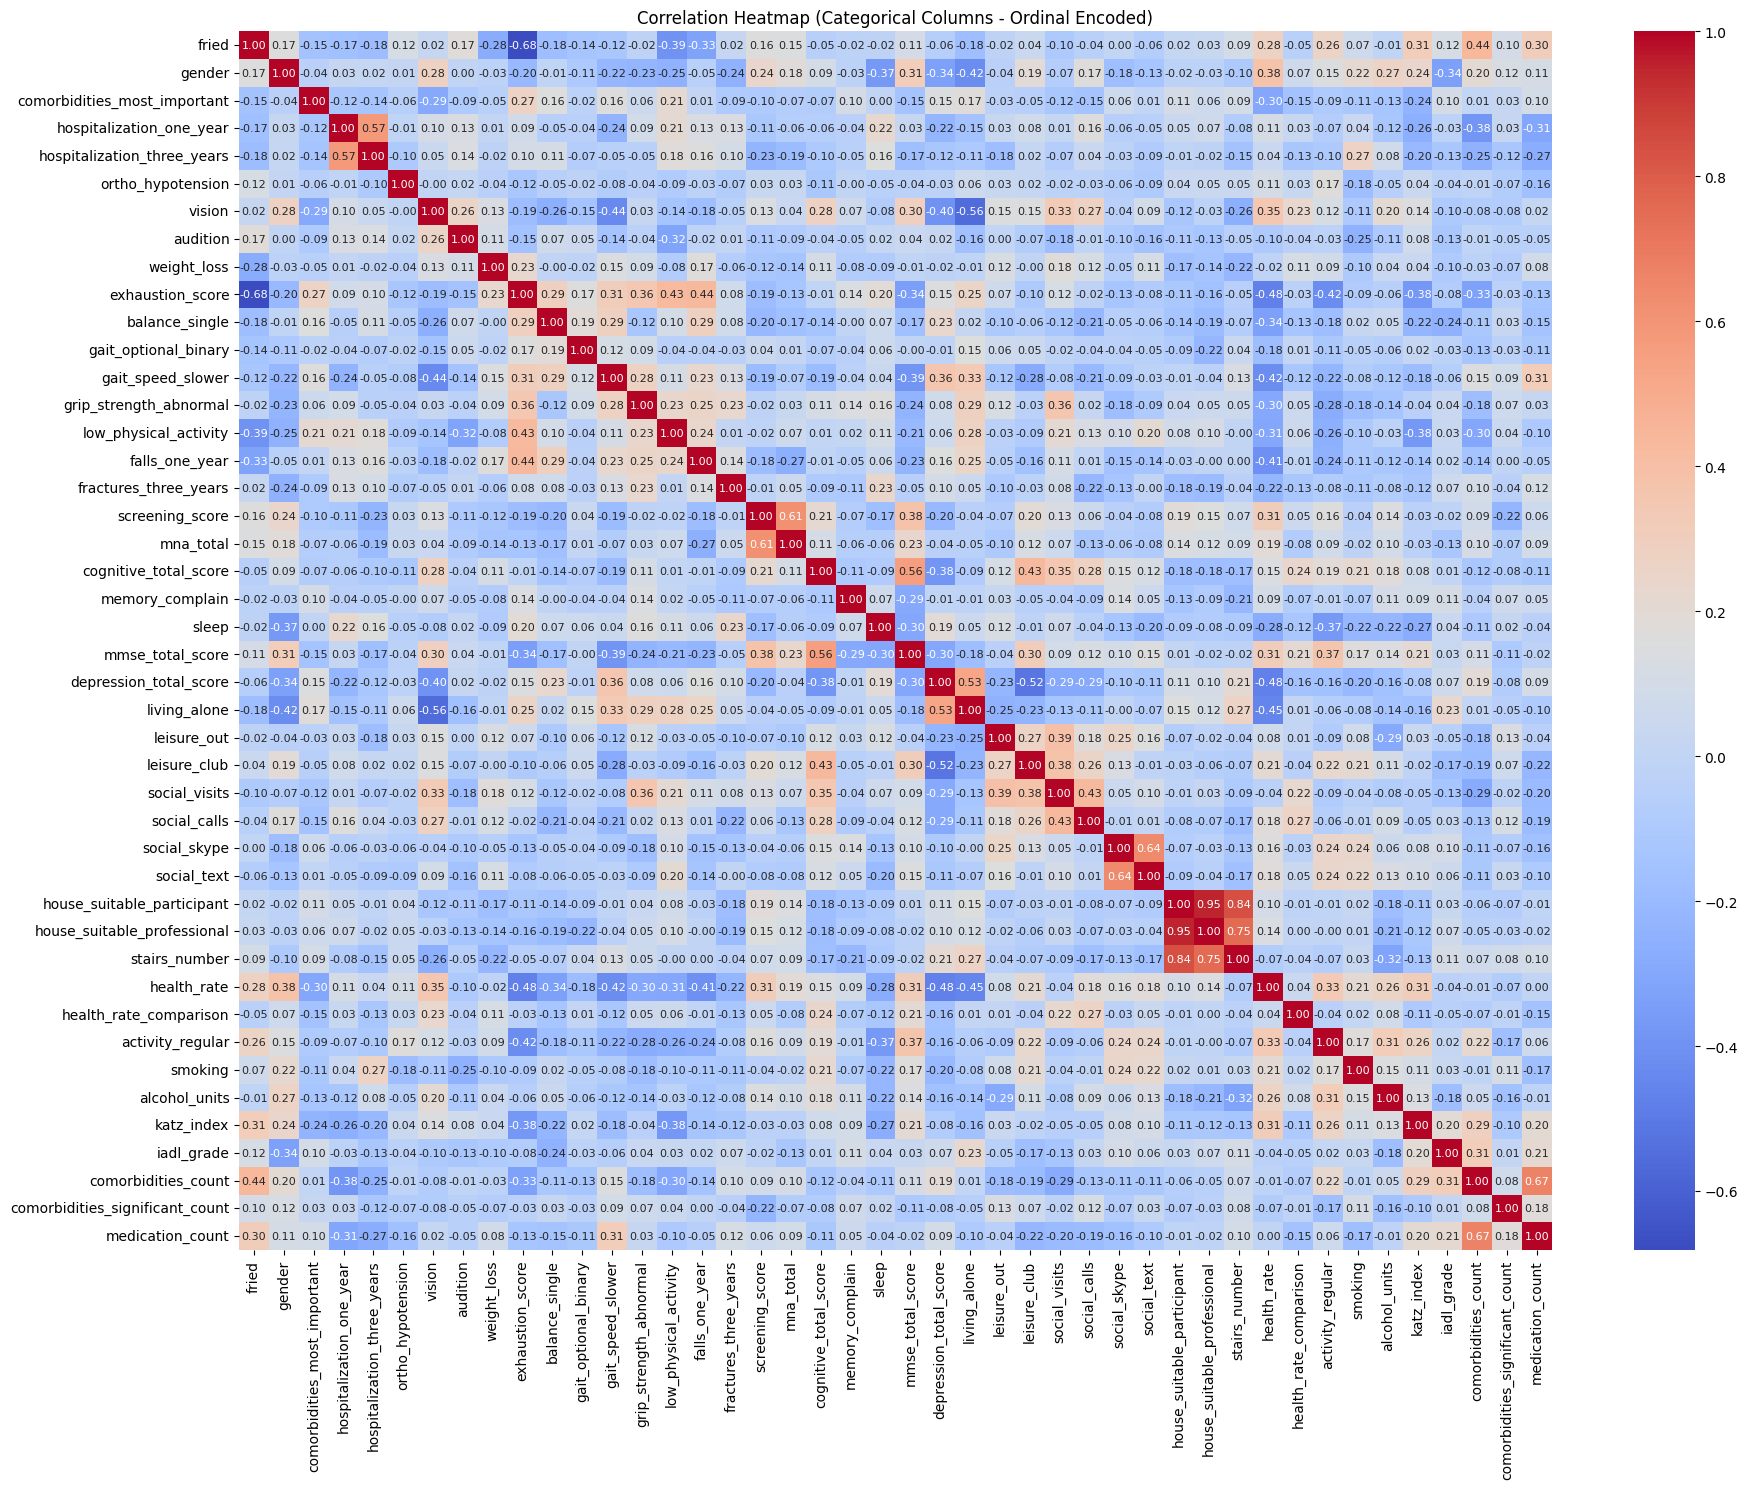


No features found with correlation > 0.95 (excluding self-correlation).

--- Encoded Value Mappings ---

Column: fried
  'Frail' -> 0
  'Non frail' -> 1
  'Pre-frail' -> 2

Column: gender
  'F' -> 0
  'M' -> 1

Column: comorbidities_most_important
  'MCI' -> 0
  'Non of the above' -> 1
  'Osteoporosis if woman  /Osteoarthritis if man' -> 2
  'Prior stroke' -> 3
  'nan' -> 4

Column: hospitalization_one_year
  '0' -> 0
  '1' -> 1
  '3' -> 2

Column: hospitalization_three_years
  '0' -> 0
  '1' -> 1
  '2' -> 2
  '3' -> 3

Column: ortho_hypotension
  'No' -> 0
  'Yes' -> 1

Column: vision
  'Sees moderately' -> 0
  'Sees poorly' -> 1
  'Sees well' -> 2

Column: audition
  'Hears moderately' -> 0
  'Hears well' -> 1

Column: weight_loss
  'No' -> 0
  'Yes' -> 1

Column: exhaustion_score
  '1' -> 0
  '2' -> 1

Column: balance_single
  '<5 sec' -> 0
  '>5 sec' -> 1
  'test non realizable' -> 2

Column: gait_optional_binary
  'False' -> 0
  'True' -> 1

Column: gait_speed_slower
  'No' -> 0


In [13]:
analyze_categorical(df,
                    correlation_threshold=0.95,
                    categorical_cols_to_exclude=['part_id','clinical_visit', 'age', 'q_date']
                    ,categorical_features = categorical_featuresdf
                    )

## 1.4. PCA - Principal Component Analysis

### 1.4.1. PCA of numerical features


Using provided numerical columns: raise_chair_time, gait_get_up, gait_speed_4m, bmi_score, bmi_body_fat, waist, lean_body_mass, anxiety_perception, social_phone, life_quality, pain_perception
Number of numerical columns being analyzed: 11


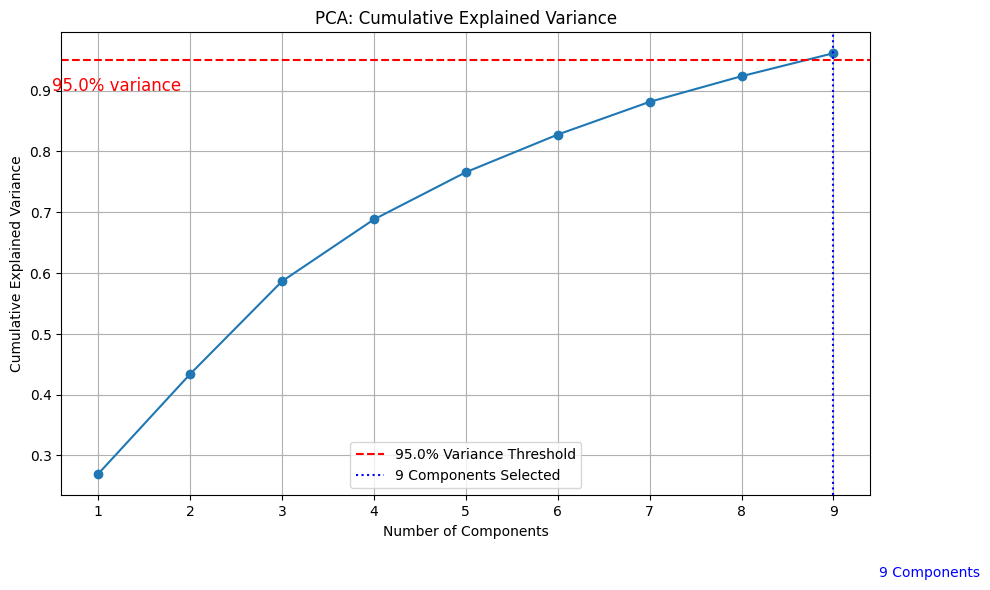

Suggested number of components to keep: 9
Features to keep: ['social_phone', 'waist', 'bmi_body_fat', 'pain_perception', 'anxiety_perception', 'bmi_score', 'life_quality']
Features to drop: ['gait_get_up', 'gait_speed_4m', 'lean_body_mass', 'raise_chair_time']


In [14]:
n_components, explained_variance_ratio, features_to_keep, features_to_drop = analyze_numerical_pca(
    df,
    numerical_cols_to_exclude=['part_id','clinical_visit', 'age' ],
    numerical_features=numerical_featuresdf,
    variance_threshold=0.95,
    imputation_strategy='mean'
)

# Print the features to keep and drop:
print("Features to keep:", features_to_keep)
print("Features to drop:", features_to_drop)

### 1.4.2. PCA of categorical features

Using provided categorical columns: fried, gender, comorbidities_most_important, hospitalization_one_year, hospitalization_three_years, ortho_hypotension, vision, audition, weight_loss, exhaustion_score, balance_single, gait_optional_binary, gait_speed_slower, grip_strength_abnormal, low_physical_activity, falls_one_year, fractures_three_years, screening_score, mna_total, cognitive_total_score, memory_complain, sleep, mmse_total_score, depression_total_score, living_alone, leisure_out, leisure_club, social_visits, social_calls, social_skype, social_text, house_suitable_participant, house_suitable_professional, stairs_number, health_rate, health_rate_comparison, activity_regular, smoking, alcohol_units, katz_index, iadl_grade, comorbidities_count, comorbidities_significant_count, medication_count
Number of categorical columns being analyzed: 44


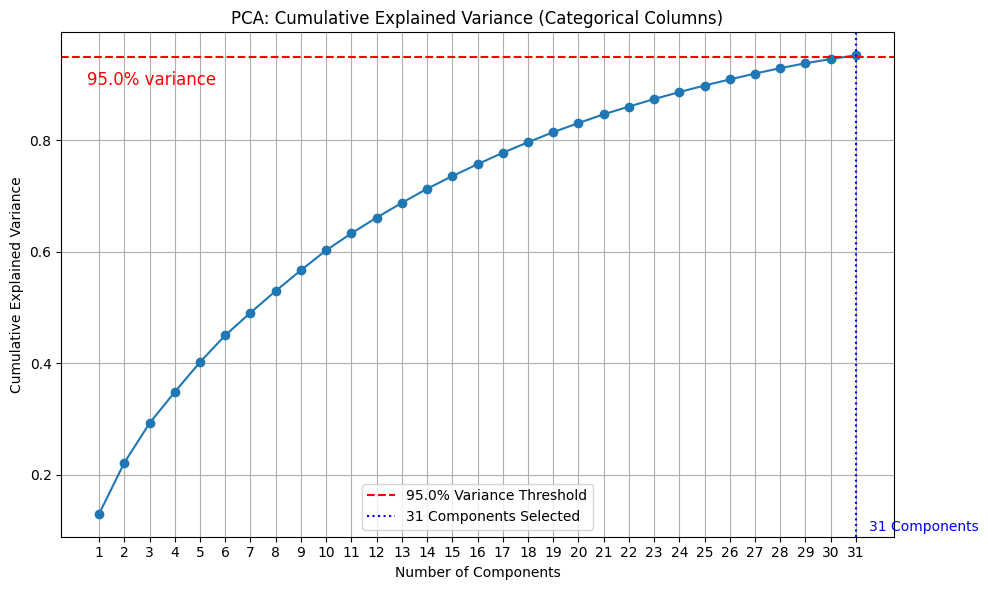

Suggested number of components to keep: 31

--- Encoded Value Mappings ---

Column: fried
  'Frail' -> 0
  'Non frail' -> 1
  'Pre-frail' -> 2

Column: gender
  'F' -> 0
  'M' -> 1

Column: comorbidities_most_important
  'MCI' -> 0
  'Non of the above' -> 1
  'Osteoporosis if woman  /Osteoarthritis if man' -> 2
  'Prior stroke' -> 3
  'nan' -> 4

Column: hospitalization_one_year
  '0' -> 0
  '1' -> 1
  '3' -> 2

Column: hospitalization_three_years
  '0' -> 0
  '1' -> 1
  '2' -> 2
  '3' -> 3

Column: ortho_hypotension
  'No' -> 0
  'Yes' -> 1

Column: vision
  'Sees moderately' -> 0
  'Sees poorly' -> 1
  'Sees well' -> 2

Column: audition
  'Hears moderately' -> 0
  'Hears well' -> 1

Column: weight_loss
  'No' -> 0
  'Yes' -> 1

Column: exhaustion_score
  '1' -> 0
  '2' -> 1

Column: balance_single
  '<5 sec' -> 0
  '>5 sec' -> 1
  'test non realizable' -> 2

Column: gait_optional_binary
  'False' -> 0
  'True' -> 1

Column: gait_speed_slower
  'No' -> 0
  'Yes' -> 1

Column: grip_str

In [15]:
# Assuming your DataFrame is 'df'
n_components, explained_variance_ratio, features_to_keep, features_to_drop, encoded_values_mapping = analyze_categorical_pca(
    df,
    categorical_cols_to_exclude=['part_id','clinical_visit', 'age', 'q_date'],  # Exclude columns as needed
    categorical_features=categorical_featuresdf,
    variance_threshold=0.95,
    imputation_strategy='most_frequent'
)

# Print the features to keep and drop:
print("Features to keep:", features_to_keep)
print("Features to drop:", features_to_drop)

# ***2. Automated data cleaning*** (->dfA)

## 2.1. Duplicate columns


In [5]:
#Loaded data into dfA as the dataframe for the data cleaning process
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   part_id                          117 non-null    int64  
 1   clinical_visit                   117 non-null    int64  
 2   fried                            117 non-null    object 
 3   gender                           117 non-null    object 
 4   q_date                           117 non-null    object 
 5   age                              117 non-null    int64  
 6   comorbidities_most_important     116 non-null    object 
 7   hospitalization_one_year         117 non-null    int64  
 8   hospitalization_three_years      117 non-null    int64  
 9   ortho_hypotension                117 non-null    object 
 10  vision                           117 non-null    object 
 11  audition                         117 non-null    object 
 12  weight_loss           

Identify duplicate columns and rows, irrespective of their data, to assess the validity of any potential composite primary keys. This is crucial for subsequent steps.

In [6]:
# Select columns to remove and apply to dfA
dfA = handle_duplicate_cols(dfA);

No duplicate columns found.


## 2.2. Discard columns or rows

that contain missing values above a defined threshold (input)

In [7]:
# Handle columns first, then rows:
dfA = handle_missing_values_threshold_col_row(dfA, threshold_col=90, threshold_row=90 );
#mna_total is not even described in the dataset


--- Handling columns with missing values (threshold: 90.00%) ---
Columns exceeding 90% missing values:
1: mna_total (97.44%)
Columns dropped: ['mna_total'].

--- Handling rows with missing values (threshold: 90.00%) ---

No rows found with more than 90.00% missing values to consider for removal.


"mna_total" exhibits an extremely high proportion of missing values (>95%) and a very low cardinality (only two distinct values). Consequently, its removal from the dataset is recommended.

## 2.3.  Key Data Preparation

for Outlier and Missing Value Treatment

Check the primary key, identify potential classes, and categorize features as either continuous numerical or discrete categorical.

### 2.3.1. Define Primary Key

Retain the dataframe's primary key for use in outlier detection and missing value imputation.

Duplicate Rows  (input) Before checking for duplicate rows it is important to be aware that in some cases the dataset was anonymized by removing the index or the primary key. This operantion can only take place when there is a disitnct indentifier for each row.

In [8]:
# Select rows to remove and apply to dfA
dfA = handle_duplicate_rows(dfA);

No duplicate rows found.


In [9]:
dfA, primary_key_cols = get_primary_key_columns(dfA,  max_key_size=3); #exclude_columns=['q_date'],

Potential composite primary key column(s) (size 2): ['part_id', 'clinical_visit']


In [10]:
print(primary_key_cols)

['part_id', 'clinical_visit']


In [11]:
check_primary_key_duplicates(dfA, primary_key_cols)

No duplicate rows found based on primary key.


False

In [12]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   part_id                          117 non-null    int64  
 1   clinical_visit                   117 non-null    int64  
 2   fried                            117 non-null    object 
 3   gender                           117 non-null    object 
 4   q_date                           117 non-null    object 
 5   age                              117 non-null    int64  
 6   comorbidities_most_important     116 non-null    object 
 7   hospitalization_one_year         117 non-null    int64  
 8   hospitalization_three_years      117 non-null    int64  
 9   ortho_hypotension                117 non-null    object 
 10  vision                           117 non-null    object 
 11  audition                         117 non-null    object 
 12  weight_loss           

### 2.3.2. Define Classes

The dataframe's potential classes should be stored, as they'll play a role in both outlier identification and missing data handling.

In [13]:
summary_of_classes, chosen_class_columns = evaluate_classes_interactive(dfA, known_class_column='health_rate')

# Display the summary
print("\nClass Summary:")
display(summary_of_classes)

# The chosen column names are now stored in the 'chosen_class_columns' variable
print("\nChosen Class Columns:", chosen_class_columns)

#You can now use chosen_class_columns for further processing
#in this dataset and according the description from the author possible classes could be 'fried', 'health_rate' and 'health_rate_comparison'


Potential class column suggested: 'health_rate' (from 'known_class_column' parameter).
Unique values in 'health_rate': 5
Top 5 counts in 'health_rate':
health_rate
4 - Good         71
3 - Medium       31
2 - Bad           6
5 - Excellent     5
1 - Very bad      4
Name: count, dtype: int64



Select additional columns to evaluate for classes (enter comma-separated column numbers).
This includes categorical and numeric columns you might want to treat as categories:
1. fried (Type: object, Unique: 3)
2. gender (Type: object, Unique: 2)
3. q_date (Type: object, Unique: 101)
4. comorbidities_most_important (Type: object, Unique: 4)
5. ortho_hypotension (Type: object, Unique: 2)
6. vision (Type: object, Unique: 3)
7. audition (Type: object, Unique: 2)
8. weight_loss (Type: object, Unique: 2)
9. balance_single (Type: object, Unique: 3)
10. gait_optional_binary (Type: bool, Unique: 2)
11. gait_speed_slower (Type: object, Unique: 2)
12. grip_strength_abnormal (Type: object, Unique: 2)
13. low_physical_activity (Type: object, Unique: 2)
14. memory_complain (Type: object, Unique: 2)
15. sleep (Type: object, Unique: 3)
16. living_alone (Type: object, Unique: 2)
17. leisure_club (Type: object, Unique: 2)
18. house_suitable_participant (Type: object, Unique: 2)
19. house_suitable_profe

,Column,Class,Count
0,health_rate,4 - Good,71
1,health_rate,3 - Medium,31
4,health_rate,2 - Bad,6
2,health_rate,5 - Excellent,5
3,health_rate,1 - Very bad,4



Chosen Class Columns: ['health_rate']


For the selected classes, add columns that will be exempted from outlier and missing value handling.

In [14]:
chosen_columns=['q_date']

### 2.3.3. Define Numerical and Categorical Features

Do not accept the default classification of features sugested by the function, it shall be analized within the description of the dataset and features such as 'social_visits' and 'social_skype'shall be classified as numerical (continuous) to be treated as the other ones.


social_visits: Number of visits and social interactions per week

social_calls: Number of telephone calls exchanged per week

social_phone: Approximate time spent on phone per week

social_skype: Approximate time spent on videoconference per week

social_text: Number of written messages (SMS and emails) sent by the participant per week

In [15]:
# Assuming 'df' is your DataFrame
summary_dict = describe_dataframe_custom_out(dfA, exclude_columns = primary_key_cols ##+ chosen_columns
                                             , zscore_threshold = 3.0
                                             , iqr_multiplier = 1.5
                                             , categorical_threshold_unique = 20
                                             , max_unique_ratio_for_categorical = 0.2
                                             , force_categorical_columns = ['anxiety_perception', 'social_phone', 'life_quality', 'pain_perception'])


print("Numerical Summary:")
display(summary_dict['numerical_summary'])

print("\nCategorical Summary:")
display(summary_dict['categorical_summary'])

numerical_features = summary_dict['numerical_features']
categorical_features = summary_dict['categorical_features']

display(numerical_features)
display(categorical_features)

Accepting default classifications. No interactive reclassification will occur.
Numerical Summary:


,Column Name,Data Type,Missing Values,Missing %,Min Value,Max Value,Mean,Median,Mode(s),Z-Score Outliers,IQR Outliers
0,raise_chair_time,float64,0,0.0%,6.900000,999.000000,53.775043,11.700000,14.0,5,6
1,gait_get_up,float64,0,0.0%,4.000000,999.000000,18.719658,9.050000,"6.0, 9.0",1,7
2,gait_speed_4m,float64,0,0.0%,2.540000,22.800000,6.619915,5.600000,5.0,4,10
3,bmi_score,float64,0,0.0%,22.479339,44.658044,28.664850,27.168115,35.430839,3,9
4,bmi_body_fat,float64,33,28.21%,19.700000,218.000000,30.225000,28.600000,23.2,1,1
5,waist,float64,1,0.85%,82.000000,188.000000,100.956897,97.000000,95.0,1,4
6,lean_body_mass,float64,33,28.21%,-78.706000,76.217500,51.856930,52.517200,"-78.706, 41.3028, 41.4882, 41.72, 41.756, 41.7...",1,3



Categorical Summary:


,Column Name,Data Type,Missing Values,Missing %,Unique Values,Mode(s)
0,fried,object,0,0.0%,3,Pre-frail
1,gender,object,0,0.0%,2,M
2,q_date,object,0,0.0%,101,"2017-11-24T00:00:00.000Z, 2017-11-29T00:00:00...."
3,age,int64,0,0.0%,16,77
4,comorbidities_most_important,object,1,0.85%,4,Non of the above
5,hospitalization_one_year,int64,0,0.0%,3,0
6,hospitalization_three_years,int64,0,0.0%,4,0
7,ortho_hypotension,object,0,0.0%,2,No
8,vision,object,0,0.0%,3,Sees well
9,audition,object,0,0.0%,2,Hears well


['raise_chair_time',
 'gait_get_up',
 'gait_speed_4m',
 'bmi_score',
 'bmi_body_fat',
 'waist',
 'lean_body_mass']

['fried',
 'gender',
 'q_date',
 'age',
 'comorbidities_most_important',
 'hospitalization_one_year',
 'hospitalization_three_years',
 'ortho_hypotension',
 'vision',
 'audition',
 'weight_loss',
 'exhaustion_score',
 'balance_single',
 'gait_optional_binary',
 'gait_speed_slower',
 'grip_strength_abnormal',
 'low_physical_activity',
 'falls_one_year',
 'fractures_three_years',
 'screening_score',
 'cognitive_total_score',
 'memory_complain',
 'sleep',
 'mmse_total_score',
 'depression_total_score',
 'anxiety_perception',
 'living_alone',
 'leisure_out',
 'leisure_club',
 'social_visits',
 'social_calls',
 'social_phone',
 'social_skype',
 'social_text',
 'house_suitable_participant',
 'house_suitable_professional',
 'stairs_number',
 'life_quality',
 'health_rate',
 'health_rate_comparison',
 'pain_perception',
 'activity_regular',
 'smoking',
 'alcohol_units',
 'katz_index',
 'iadl_grade',
 'comorbidities_count',
 'comorbidities_significant_count',
 'medication_count']

## 2.4. Addressing outliers Numerical Features

Addressing outliers (especially problematic ones) before filling missing values if those outliers can significantly influence your imputation strategy. This ensures that the imputed values are more accurate and representative of the underlying data distribution.

Before handle missing values it's important to remove outliers on the numeric features to prevent filling missing values with wrong median or mean regarding distribution of each column.

Outliers can be classified into two categories:

Univariate outliers: Anomalies present within a single variable.

Multivariate outliers: Anomalies present in the relationship between multiple variables.

Starting with univariate numeric outliers, having in consideration:

Methods/Considerations:

Direct Removal:

Once identified by Z-score, IQR, LOF, Isolation Forest, etc., the corresponding rows or data points are simply dropped from the dataset.

Impact Assessment:

Before removal, it's crucial to assess the potential impact on the sample size and the representativeness of the remaining data. Removing too many outliers can lead to a biased or insufficient dataset.

Drawbacks:

Loss of Information: Removing data, even outliers, means losing potentially valuable information.

Bias: If outliers are removed without a strong justification, it can introduce bias into the analysis or model.

Reduced Sample Size: For smaller datasets, removing outliers can significantly reduce the sample size, impacting statistical power.



### 2.4.1. Detect Univariate Outliers threshold=3.0

Start with Zscore method to remove outliers only on numeric features and fill missing values afterwards

In [16]:
outlier_df = detect_univariate_outliers_zscore_df_pk(dfA, primary_key_cols
                                                     , numerical_features
                                                     ,threshold=3.0

                                                     , exclude_cols=chosen_columns
                                                     )

# Print the outlier DataFrame
display(outlier_df)

Starting univariate outlier detection (numerical features only)...
Detecting outliers in numerical columns:
  - Column 'raise_chair_time': Found 5 Z-score outliers.
  - Column 'gait_get_up': Found 1 Z-score outliers.
  - Column 'gait_speed_4m': Found 4 Z-score outliers.
  - Column 'bmi_score': Found 3 Z-score outliers.
  - Column 'bmi_body_fat': Found 1 Z-score outliers.
  - Column 'waist': Found 1 Z-score outliers.
  - Column 'lean_body_mass': Found 1 Z-score outliers.


,part_id,clinical_visit,Outlier_Column,Outlier_Value
0,2085,3,bmi_body_fat,218.000000
1,1088,2,bmi_score,44.414062
2,1088,3,bmi_score,44.375000
3,1088,4,bmi_score,44.658044
4,1104,1,gait_get_up,999.000000
5,1104,1,gait_speed_4m,22.800000
6,1104,3,gait_speed_4m,20.400000
7,2584,1,gait_speed_4m,18.000000
8,2584,3,gait_speed_4m,18.000000
9,2085,3,lean_body_mass,-78.706000


#### 2.4.1.1. bmi_body_fat (o)

Using provided numerical columns (and ignoring other data types): raise_chair_time, gait_get_up, gait_speed_4m, bmi_score, bmi_body_fat, waist, lean_body_mass

Select an outlier detection method:
1: Z-score (Numerical)
2: IQR (Interquartile Range - Numerical)
3: MAD (Median Absolute Deviation - Numerical)

Recommended Z-score thresholds are typically 2.0, 2.5, or 3.0 (default).

Select a numerical column for outlier detection:
1: waist
2: lean_body_mass
3: raise_chair_time
4: bmi_body_fat
5: gait_speed_4m
6: gait_get_up
7: bmi_score

Analyzing column: 'bmi_body_fat' using Z-SCORE (NUMERICAL) with chosen threshold 3.0...
Visualizing 'bmi_body_fat':


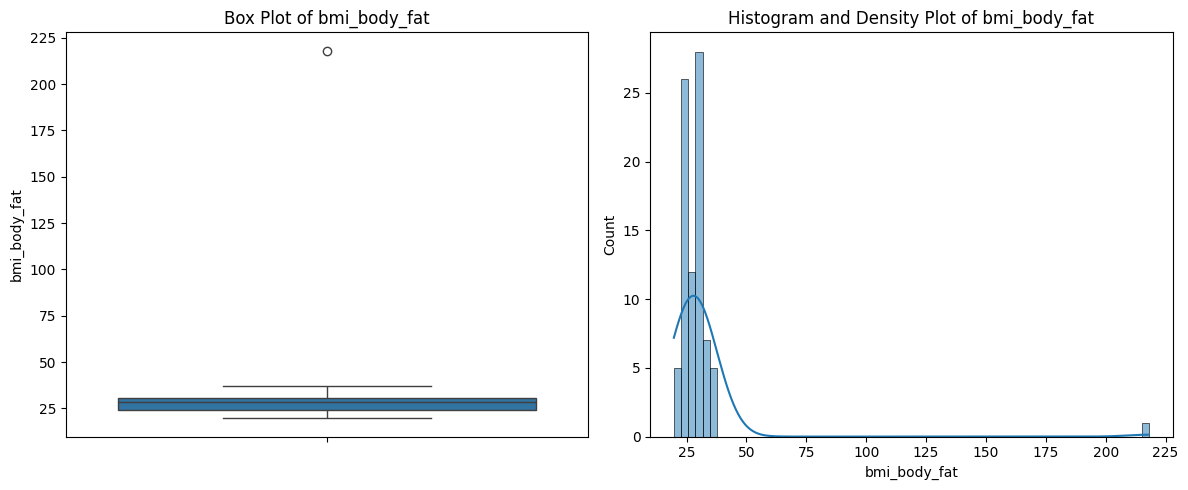

Applying Z-score (Numerical) with threshold=3.0...

Detected Univariate Outliers in 'bmi_body_fat' using Z-SCORE (NUMERICAL):
    part_id  clinical_visit      fried gender                    q_date  age comorbidities_most_important  hospitalization_one_year  hospitalization_three_years ortho_hypotension     vision    audition weight_loss  exhaustion_score  raise_chair_time balance_single  gait_get_up  gait_speed_4m  gait_optional_binary gait_speed_slower grip_strength_abnormal low_physical_activity  falls_one_year  fractures_three_years  bmi_score  bmi_body_fat  waist  lean_body_mass  screening_score  cognitive_total_score memory_complain             sleep  mmse_total_score  depression_total_score  anxiety_perception living_alone  leisure_out leisure_club  social_visits  social_calls  social_phone  social_skype  social_text house_suitable_participant house_suitable_professional  stairs_number  life_quality health_rate health_rate_comparison  pain_perception activity_regular       smoki

In [29]:
#bmi_body_fat
outlier_df_uni, outlier_indices_uni, method_used_uni, column_analyzed_uni = detect_univariate_outliers_interactiveUNI(dfA,
                                                                                                                      primary_key_cols=primary_key_cols,
                                                                                                                      numerical_columns_list=numerical_features,
                                                                                                                      #categorical_columns_list=categorical_features,
                                                                                                                      exclude_cols=chosen_columns)

In [30]:
print(dfA.loc[dfA['part_id'] == 2085, ['part_id', 'clinical_visit','lean_body_mass', 'bmi_score','bmi_body_fat','fried','health_rate_comparison','health_rate']].to_string())

    part_id  clinical_visit  lean_body_mass  bmi_score  bmi_body_fat      fried health_rate_comparison health_rate
68     2085               1             NaN  27.120316           NaN  Pre-frail     3 - About the same    4 - Good
69     2085               2             NaN  27.325773           NaN  Pre-frail       5 - A lot better  3 - Medium
70     2085               3        -78.7060  27.407955         218.0  Pre-frail     3 - About the same    4 - Good
71     2085               4         51.2715  26.978782          22.9  Pre-frail     3 - About the same    4 - Good


It´s clear an outlier.

#### 2.4.1.2. bmi_score

Using provided numerical columns (and ignoring other data types): raise_chair_time, gait_get_up, gait_speed_4m, bmi_score, bmi_body_fat, waist, lean_body_mass

Select an outlier detection method:
1: Z-score (Numerical)
2: IQR (Interquartile Range - Numerical)
3: MAD (Median Absolute Deviation - Numerical)

Recommended Z-score thresholds are typically 2.0, 2.5, or 3.0 (default).

Select a numerical column for outlier detection:
1: waist
2: lean_body_mass
3: raise_chair_time
4: bmi_body_fat
5: gait_speed_4m
6: gait_get_up
7: bmi_score

Analyzing column: 'bmi_score' using Z-SCORE (NUMERICAL) with chosen threshold 3.0...
Visualizing 'bmi_score':


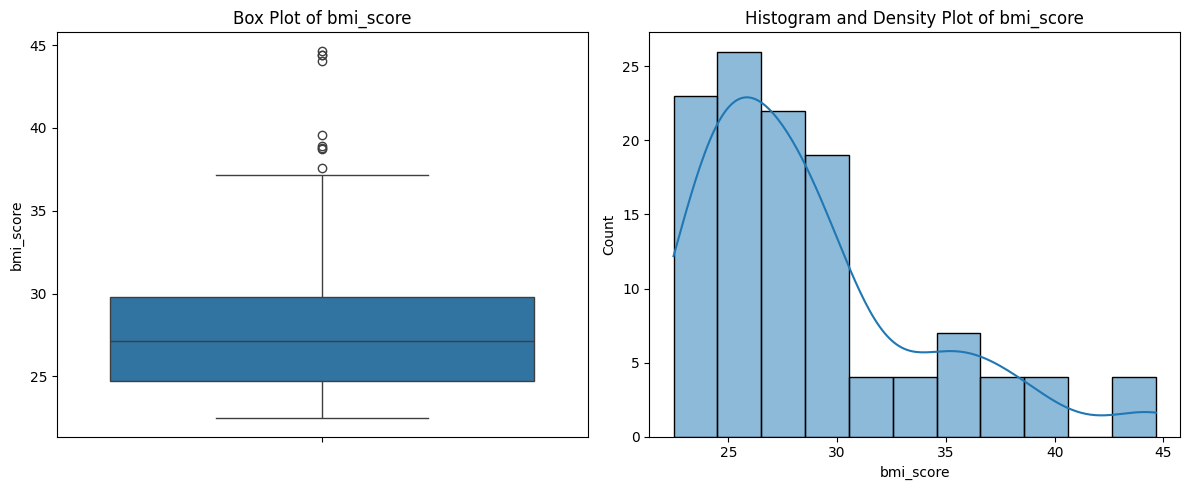

Applying Z-score (Numerical) with threshold=3.0...

Detected Univariate Outliers in 'bmi_score' using Z-SCORE (NUMERICAL):
    part_id  clinical_visit  fried gender                    q_date  age                   comorbidities_most_important  hospitalization_one_year  hospitalization_three_years ortho_hypotension           vision          audition weight_loss  exhaustion_score  raise_chair_time       balance_single  gait_get_up  gait_speed_4m  gait_optional_binary gait_speed_slower grip_strength_abnormal low_physical_activity  falls_one_year  fractures_three_years  bmi_score  bmi_body_fat  waist  lean_body_mass  screening_score  cognitive_total_score memory_complain                     sleep  mmse_total_score  depression_total_score  anxiety_perception living_alone  leisure_out leisure_club  social_visits  social_calls  social_phone  social_skype  social_text house_suitable_participant house_suitable_professional  stairs_number  life_quality   health_rate health_rate_comparison  pain_

In [31]:
#bmi_score
outlier_df_uni, outlier_indices_uni, method_used_uni, column_analyzed_uni = detect_univariate_outliers_interactiveUNI(dfA,
                                                                                                                      primary_key_cols=primary_key_cols,
                                                                                                                      numerical_columns_list=numerical_features,
                                                                                                                      #categorical_columns_list=categorical_features,
                                                                                                                      exclude_cols=chosen_columns)

In [32]:
print(dfA.loc[dfA['part_id'] == 1088, ['part_id', 'clinical_visit', 'lean_body_mass', 'bmi_score','bmi_body_fat','fried','health_rate_comparison','health_rate']].to_string())

    part_id  clinical_visit  lean_body_mass  bmi_score  bmi_body_fat  fried health_rate_comparison   health_rate
12     1088               1         71.5152  44.062500          36.6  Frail     3 - About the same  1 - Very bad
13     1088               2         71.4036  44.414062          37.2  Frail     3 - About the same  1 - Very bad
14     1088               3         71.7952  44.375000          36.8  Frail     2 - A little worse  1 - Very bad
15     1088               4         71.0141  44.658044          37.1  Frail     3 - About the same  1 - Very bad


It´s not an outlier.

#### 2.4.1.3. lean_body_mass (o)

Using provided numerical columns (and ignoring other data types): raise_chair_time, gait_get_up, gait_speed_4m, bmi_score, bmi_body_fat, waist, lean_body_mass

Select an outlier detection method:
1: Z-score (Numerical)
2: IQR (Interquartile Range - Numerical)
3: MAD (Median Absolute Deviation - Numerical)

Recommended Z-score thresholds are typically 2.0, 2.5, or 3.0 (default).

Select a numerical column for outlier detection:
1: waist
2: lean_body_mass
3: raise_chair_time
4: bmi_body_fat
5: gait_speed_4m
6: gait_get_up
7: bmi_score

Analyzing column: 'lean_body_mass' using Z-SCORE (NUMERICAL) with chosen threshold 3.0...
Visualizing 'lean_body_mass':


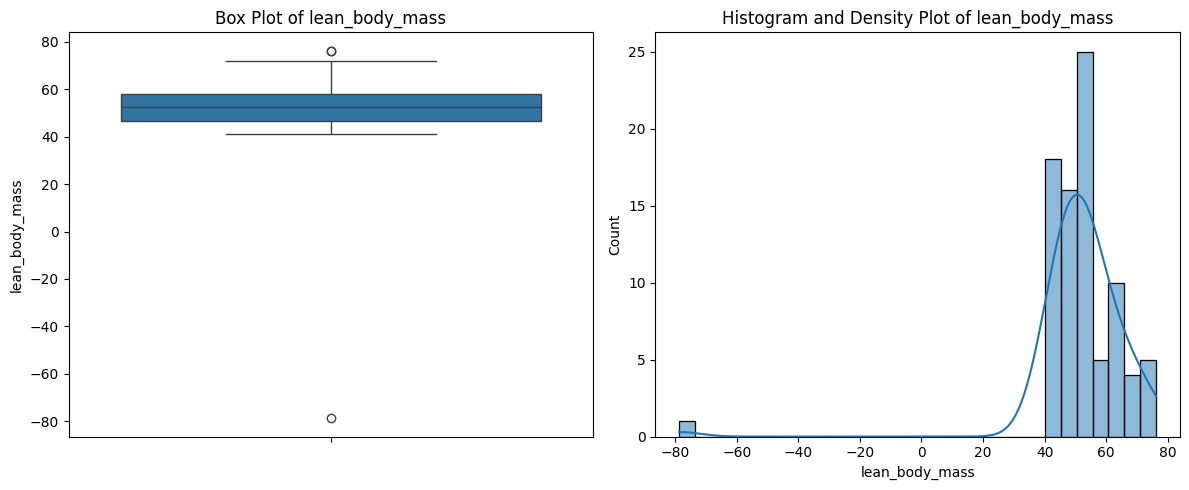

Applying Z-score (Numerical) with threshold=3.0...

Detected Univariate Outliers in 'lean_body_mass' using Z-SCORE (NUMERICAL):
    part_id  clinical_visit      fried gender                    q_date  age comorbidities_most_important  hospitalization_one_year  hospitalization_three_years ortho_hypotension     vision    audition weight_loss  exhaustion_score  raise_chair_time balance_single  gait_get_up  gait_speed_4m  gait_optional_binary gait_speed_slower grip_strength_abnormal low_physical_activity  falls_one_year  fractures_three_years  bmi_score  bmi_body_fat  waist  lean_body_mass  screening_score  cognitive_total_score memory_complain             sleep  mmse_total_score  depression_total_score  anxiety_perception living_alone  leisure_out leisure_club  social_visits  social_calls  social_phone  social_skype  social_text house_suitable_participant house_suitable_professional  stairs_number  life_quality health_rate health_rate_comparison  pain_perception activity_regular       smo

In [33]:
#lean_body_mass
outlier_df_uni, outlier_indices_uni, method_used_uni, column_analyzed_uni = detect_univariate_outliers_interactiveUNI(dfA,
                                                                                                                      primary_key_cols=primary_key_cols,
                                                                                                                      numerical_columns_list=numerical_features,
                                                                                                                      #categorical_columns_list=categorical_features,
                                                                                                                      exclude_cols=chosen_columns)

In [34]:
print(dfA.loc[dfA['part_id'] == 2085, ['part_id', 'clinical_visit', 'lean_body_mass', 'bmi_score','bmi_body_fat','fried','health_rate_comparison','health_rate']].to_string())

    part_id  clinical_visit  lean_body_mass  bmi_score  bmi_body_fat      fried health_rate_comparison health_rate
68     2085               1             NaN  27.120316           NaN  Pre-frail     3 - About the same    4 - Good
69     2085               2             NaN  27.325773           NaN  Pre-frail       5 - A lot better  3 - Medium
70     2085               3        -78.7060  27.407955         218.0  Pre-frail     3 - About the same    4 - Good
71     2085               4         51.2715  26.978782          22.9  Pre-frail     3 - About the same    4 - Good


It's clear an outlier.

#### 2.4.1.4. gait_get_up (o)

Using provided numerical columns (and ignoring other data types): raise_chair_time, gait_get_up, gait_speed_4m, bmi_score, bmi_body_fat, waist, lean_body_mass

Select an outlier detection method:
1: Z-score (Numerical)
2: IQR (Interquartile Range - Numerical)
3: MAD (Median Absolute Deviation - Numerical)

Recommended Z-score thresholds are typically 2.0, 2.5, or 3.0 (default).

Select a numerical column for outlier detection:
1: waist
2: lean_body_mass
3: raise_chair_time
4: bmi_body_fat
5: gait_speed_4m
6: gait_get_up
7: bmi_score

Analyzing column: 'gait_get_up' using Z-SCORE (NUMERICAL) with chosen threshold 3.0...
Visualizing 'gait_get_up':


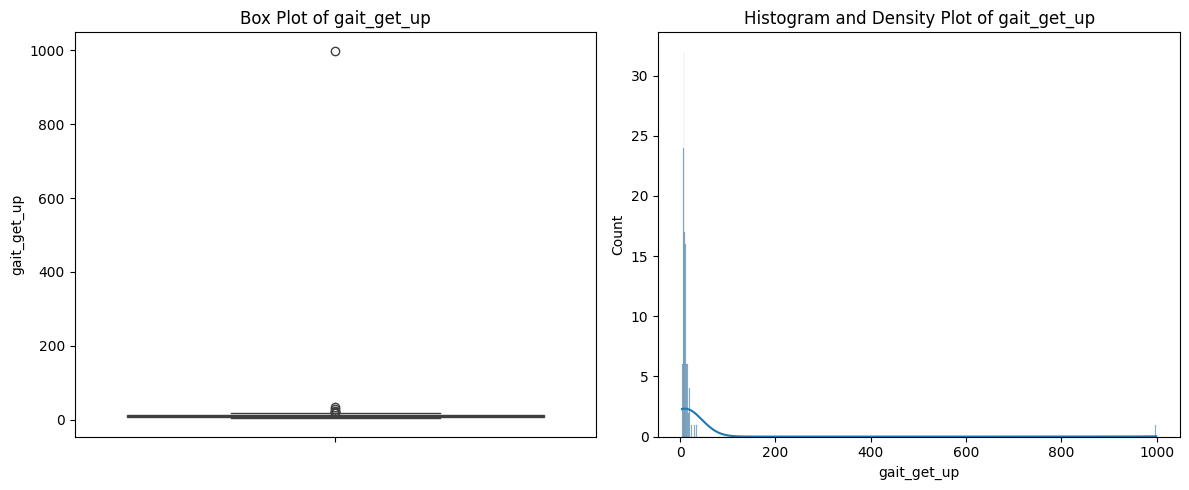

Applying Z-score (Numerical) with threshold=3.0...

Detected Univariate Outliers in 'gait_get_up' using Z-SCORE (NUMERICAL):
    part_id  clinical_visit  fried gender                    q_date  age comorbidities_most_important  hospitalization_one_year  hospitalization_three_years ortho_hypotension           vision    audition weight_loss  exhaustion_score  raise_chair_time       balance_single  gait_get_up  gait_speed_4m  gait_optional_binary gait_speed_slower grip_strength_abnormal low_physical_activity  falls_one_year  fractures_three_years  bmi_score  bmi_body_fat  waist  lean_body_mass  screening_score  cognitive_total_score memory_complain                     sleep  mmse_total_score  depression_total_score  anxiety_perception living_alone  leisure_out leisure_club  social_visits  social_calls  social_phone  social_skype  social_text house_suitable_participant house_suitable_professional  stairs_number  life_quality health_rate health_rate_comparison  pain_perception activity_regu

In [35]:
#gait_get_up
outlier_df_uni, outlier_indices_uni, method_used_uni, column_analyzed_uni = detect_univariate_outliers_interactiveUNI(dfA,
                                                                                                                      primary_key_cols=primary_key_cols,
                                                                                                                      numerical_columns_list=numerical_features,
                                                                                                                      #categorical_columns_list=categorical_features,
                                                                                                                      exclude_cols=chosen_columns)

In [36]:
print(dfA.loc[dfA['part_id'] == 1104, ['part_id', 'clinical_visit','gait_speed_4m','raise_chair_time', 'gait_get_up','fried','health_rate_comparison','health_rate']].to_string())

    part_id  clinical_visit  gait_speed_4m  raise_chair_time  gait_get_up  fried health_rate_comparison health_rate
56     1104               1           22.8             999.0        999.0  Frail     3 - About the same     2 - Bad
57     1104               2           13.8             999.0         24.7  Frail     3 - About the same     2 - Bad
58     1104               3           20.4             999.0         34.7  Frail     3 - About the same     2 - Bad
59     1104               4           15.6             999.0         30.1  Frail    4 - A little better     2 - Bad


It's clearly an outlier.

#### 2.4.1.5. gait_speed_4m

Using provided numerical columns (and ignoring other data types): raise_chair_time, gait_get_up, gait_speed_4m, bmi_score, bmi_body_fat, waist, lean_body_mass

Select an outlier detection method:
1: Z-score (Numerical)
2: IQR (Interquartile Range - Numerical)
3: MAD (Median Absolute Deviation - Numerical)

Recommended Z-score thresholds are typically 2.0, 2.5, or 3.0 (default).

Select a numerical column for outlier detection:
1: waist
2: lean_body_mass
3: raise_chair_time
4: bmi_body_fat
5: gait_speed_4m
6: gait_get_up
7: bmi_score

Analyzing column: 'gait_speed_4m' using Z-SCORE (NUMERICAL) with chosen threshold 3.0...
Visualizing 'gait_speed_4m':


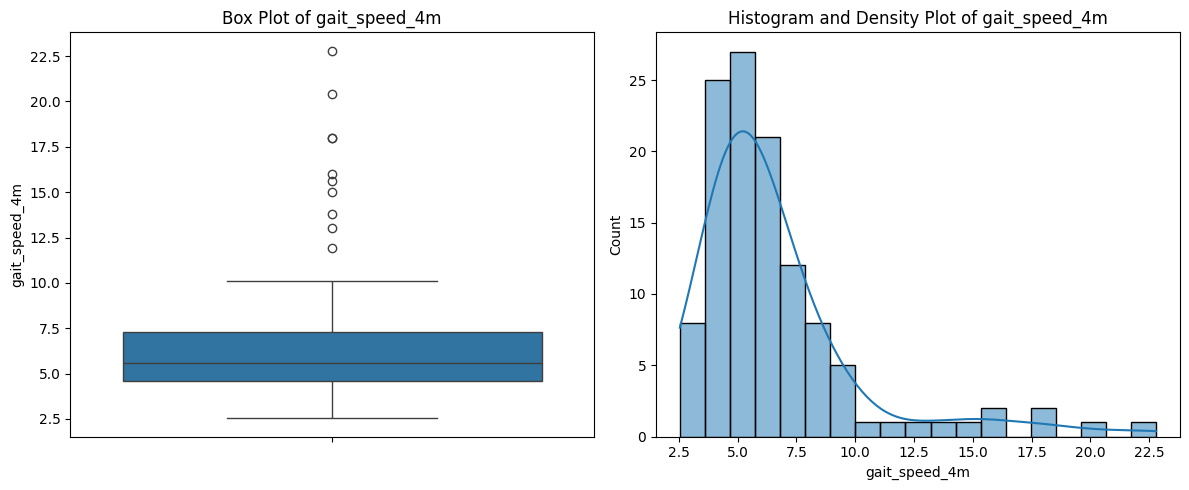

Applying Z-score (Numerical) with threshold=3.0...

Detected Univariate Outliers in 'gait_speed_4m' using Z-SCORE (NUMERICAL):
     part_id  clinical_visit  fried gender                    q_date  age comorbidities_most_important  hospitalization_one_year  hospitalization_three_years ortho_hypotension           vision          audition weight_loss  exhaustion_score  raise_chair_time       balance_single  gait_get_up  gait_speed_4m  gait_optional_binary gait_speed_slower grip_strength_abnormal low_physical_activity  falls_one_year  fractures_three_years  bmi_score  bmi_body_fat  waist  lean_body_mass  screening_score  cognitive_total_score memory_complain                     sleep  mmse_total_score  depression_total_score  anxiety_perception living_alone  leisure_out leisure_club  social_visits  social_calls  social_phone  social_skype  social_text house_suitable_participant house_suitable_professional  stairs_number  life_quality health_rate health_rate_comparison  pain_perception acti

In [37]:
#gait_speed_4m
outlier_df_uni, outlier_indices_uni, method_used_uni, column_analyzed_uni = detect_univariate_outliers_interactiveUNI(dfA,
                                                                                                                      primary_key_cols=primary_key_cols,
                                                                                                                      numerical_columns_list=numerical_features,
                                                                                                                      #categorical_columns_list=categorical_features,
                                                                                                                      exclude_cols=chosen_columns)

In [38]:
print(dfA.loc[dfA['part_id'].isin([1104,2584]), ['part_id', 'clinical_visit', 'gait_speed_4m','raise_chair_time', 'gait_get_up','fried','health_rate_comparison','health_rate']].to_string())

     part_id  clinical_visit  gait_speed_4m  raise_chair_time  gait_get_up  fried health_rate_comparison health_rate
56      1104               1           22.8             999.0        999.0  Frail     3 - About the same     2 - Bad
57      1104               2           13.8             999.0         24.7  Frail     3 - About the same     2 - Bad
58      1104               3           20.4             999.0         34.7  Frail     3 - About the same     2 - Bad
59      1104               4           15.6             999.0         30.1  Frail    4 - A little better     2 - Bad
113     2584               1           18.0              14.0         15.0  Frail     2 - A little worse    4 - Good
114     2584               2           15.0              14.0         12.0  Frail     3 - About the same    4 - Good
115     2584               3           18.0              14.0         15.0  Frail     3 - About the same    4 - Good
116     2584               4           16.0              14.2   

Outliers originating from two patients were identified. Excluding these data points might introduce bias.

#### 2.4.1.6. raise_chair_time (o)

Using provided numerical columns (and ignoring other data types): raise_chair_time, gait_get_up, gait_speed_4m, bmi_score, bmi_body_fat, waist, lean_body_mass

Select an outlier detection method:
1: Z-score (Numerical)
2: IQR (Interquartile Range - Numerical)
3: MAD (Median Absolute Deviation - Numerical)

Recommended Z-score thresholds are typically 2.0, 2.5, or 3.0 (default).

Select a numerical column for outlier detection:
1: waist
2: lean_body_mass
3: raise_chair_time
4: bmi_body_fat
5: gait_speed_4m
6: gait_get_up
7: bmi_score

Analyzing column: 'raise_chair_time' using Z-SCORE (NUMERICAL) with chosen threshold 3.0...
Visualizing 'raise_chair_time':


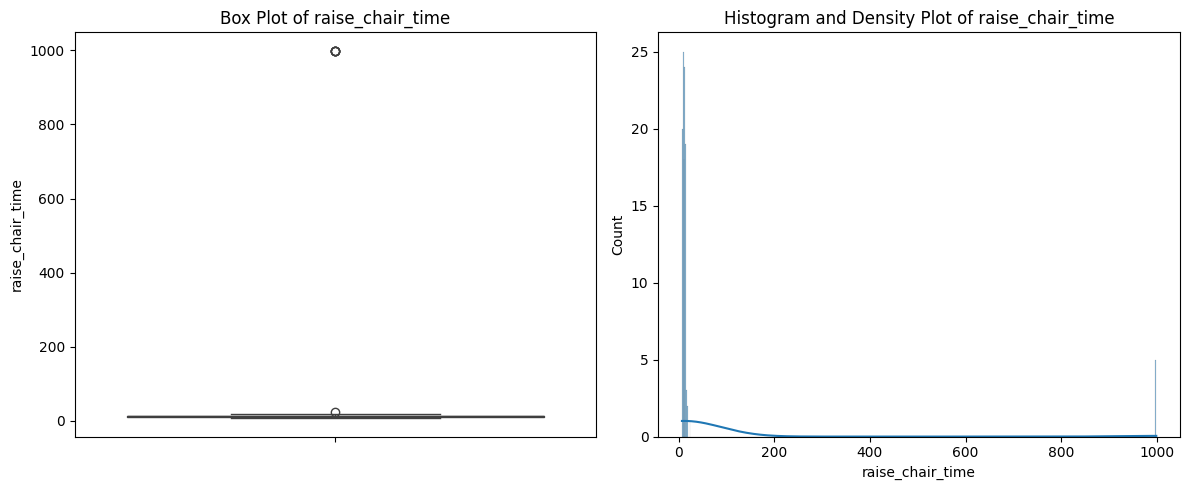

Applying Z-score (Numerical) with threshold=3.0...

Detected Univariate Outliers in 'raise_chair_time' using Z-SCORE (NUMERICAL):
    part_id  clinical_visit      fried gender                    q_date  age comorbidities_most_important  hospitalization_one_year  hospitalization_three_years ortho_hypotension           vision          audition weight_loss  exhaustion_score  raise_chair_time       balance_single  gait_get_up  gait_speed_4m  gait_optional_binary gait_speed_slower grip_strength_abnormal low_physical_activity  falls_one_year  fractures_three_years  bmi_score  bmi_body_fat  waist  lean_body_mass  screening_score  cognitive_total_score memory_complain                     sleep  mmse_total_score  depression_total_score  anxiety_perception living_alone  leisure_out leisure_club  social_visits  social_calls  social_phone  social_skype  social_text house_suitable_participant house_suitable_professional  stairs_number  life_quality health_rate health_rate_comparison  pain_perceptio

In [39]:
#raise_chair_time
outlier_df_uni, outlier_indices_uni, method_used_uni, column_analyzed_uni = detect_univariate_outliers_interactiveUNI(dfA,
                                                                                                                      primary_key_cols=primary_key_cols,
                                                                                                                      numerical_columns_list=numerical_features,
                                                                                                                      #categorical_columns_list=categorical_features,
                                                                                                                      exclude_cols=chosen_columns)

In [40]:
print(dfA.loc[dfA['part_id'].isin([1104,1090]), ['part_id', 'clinical_visit', 'gait_speed_4m','raise_chair_time', 'gait_get_up','fried','health_rate_comparison','health_rate']].to_string())

    part_id  clinical_visit  gait_speed_4m  raise_chair_time  gait_get_up      fried health_rate_comparison health_rate
20     1090               1          11.90            999.00          7.9  Pre-frail     2 - A little worse    4 - Good
21     1090               2           8.41             24.31         15.3  Pre-frail     2 - A little worse    4 - Good
22     1090               3          10.10             18.30         16.2  Pre-frail     2 - A little worse  3 - Medium
23     1090               4           9.60             19.20         16.5  Pre-frail     2 - A little worse  3 - Medium
56     1104               1          22.80            999.00        999.0      Frail     3 - About the same     2 - Bad
57     1104               2          13.80            999.00         24.7      Frail     3 - About the same     2 - Bad
58     1104               3          20.40            999.00         34.7      Frail     3 - About the same     2 - Bad
59     1104               4          15.

Only 1090 is an outlier.

#### 2.4.1.7. waist (o)

Using provided numerical columns (and ignoring other data types): raise_chair_time, gait_get_up, gait_speed_4m, bmi_score, bmi_body_fat, waist, lean_body_mass

Select an outlier detection method:
1: Z-score (Numerical)
2: IQR (Interquartile Range - Numerical)
3: MAD (Median Absolute Deviation - Numerical)

Recommended Z-score thresholds are typically 2.0, 2.5, or 3.0 (default).

Select a numerical column for outlier detection:
1: waist
2: lean_body_mass
3: raise_chair_time
4: bmi_body_fat
5: gait_speed_4m
6: gait_get_up
7: bmi_score

Analyzing column: 'waist' using Z-SCORE (NUMERICAL) with chosen threshold 3.0...
Visualizing 'waist':


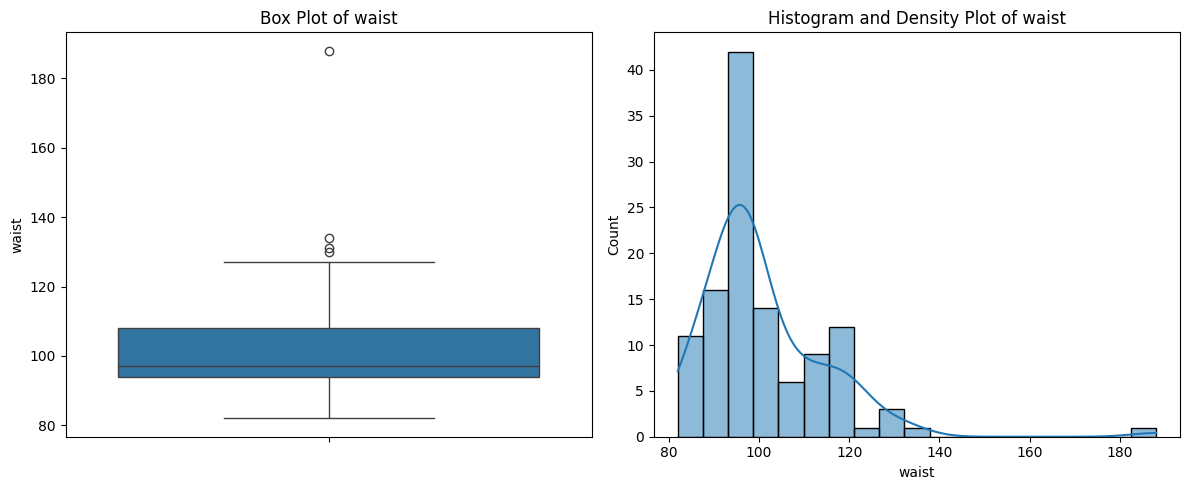

Applying Z-score (Numerical) with threshold=3.0...

Detected Univariate Outliers in 'waist' using Z-SCORE (NUMERICAL):
    part_id  clinical_visit      fried gender                    q_date  age comorbidities_most_important  hospitalization_one_year  hospitalization_three_years ortho_hypotension     vision    audition weight_loss  exhaustion_score  raise_chair_time balance_single  gait_get_up  gait_speed_4m  gait_optional_binary gait_speed_slower grip_strength_abnormal low_physical_activity  falls_one_year  fractures_three_years  bmi_score  bmi_body_fat  waist  lean_body_mass  screening_score  cognitive_total_score memory_complain                     sleep  mmse_total_score  depression_total_score  anxiety_perception living_alone  leisure_out leisure_club  social_visits  social_calls  social_phone  social_skype  social_text house_suitable_participant house_suitable_professional  stairs_number  life_quality health_rate health_rate_comparison  pain_perception activity_regular         sm

In [41]:
#waist
outlier_df_uni, outlier_indices_uni, method_used_uni, column_analyzed_uni = detect_univariate_outliers_interactiveUNI(dfA,
                                                                                                                      primary_key_cols=primary_key_cols,
                                                                                                                      numerical_columns_list=numerical_features,
                                                                                                                      #categorical_columns_list=categorical_features,
                                                                                                                      exclude_cols=chosen_columns)

In [42]:
print(dfA.loc[dfA['part_id'] == 2087, ['part_id', 'clinical_visit','waist','fried','health_rate_comparison','health_rate']].to_string())

    part_id  clinical_visit  waist      fried health_rate_comparison    health_rate
76     2087               1   89.0  Non frail     3 - About the same       4 - Good
77     2087               2   85.0  Non frail     3 - About the same       4 - Good
78     2087               3   85.0  Pre-frail     3 - About the same  5 - Excellent
79     2087               4  188.0  Pre-frail     3 - About the same       4 - Good


It's clearly an outlier.

Analizing outliers on numerical features within Z-Score method with a threshold iquals to 3 and to avoid bias, just take into account the features where there's only one data point claimed as outlier.

Next step is to raise the threshold to 5 and detect these outliers.

### 2.4.3. Remove Outliers on numerical features

In [17]:
# Step 2: Call the new interactive removal function
print("Initiating interactive outlier removal...")
df_after_removal = remove_outliers_interactively(dfA, outlier_df, primary_key_cols)

#print("\n--- Final DataFrame After Interactive Outlier Removal ---")
#print(df_after_removal.to_string())

print("\n--- Differences (Original vs. Modified) ---")
# This comparison will show the NaNs where values were removed
diff_df = dfA.compare(df_after_removal, keep_equal=True)
if not diff_df.empty:
  print(diff_df.to_string())
else:
  print("No changes were made to the DataFrame during the interactive process.")

Initiating interactive outlier removal...

--- Detected Outliers for Review ---
 Option  part_id  clinical_visit   Outlier_Column  Outlier_Value
      1     2085               3     bmi_body_fat     218.000000
      2     1088               2        bmi_score      44.414062
      3     1088               3        bmi_score      44.375000
      4     1088               4        bmi_score      44.658044
      5     1104               1      gait_get_up     999.000000
      6     1104               1    gait_speed_4m      22.800000
      7     1104               3    gait_speed_4m      20.400000
      8     2584               1    gait_speed_4m      18.000000
      9     2584               3    gait_speed_4m      18.000000
     10     2085               3   lean_body_mass     -78.706000
     11     1090               1 raise_chair_time     999.000000
     12     1104               1 raise_chair_time     999.000000
     13     1104               2 raise_chair_time     999.000000
     14   

### 2.4.4. Comfirmation of removed Outliers


In [44]:
# Assuming your DataFrame is called 'df', the primary key is composed of 'part_id' and 'clinical_visit',
# and you want to exclude columns 'col1' and 'col2' from outlier detection
outlier_df2 = detect_univariate_outliers_zscore_df_pk(df_after_removal, primary_key_cols
                                                      , numerical_features
                                                      ,threshold=3 #keep 5
                                                      , exclude_cols=chosen_columns
                                                     )

# Print the outlier DataFrame
display(outlier_df2)

Starting univariate outlier detection (numerical features only)...
Detecting outliers in numerical columns:
  - Column 'raise_chair_time': Found 4 Z-score outliers.
  - Column 'gait_get_up': Found 3 Z-score outliers.
  - Column 'gait_speed_4m': Found 4 Z-score outliers.
  - Column 'bmi_score': Found 3 Z-score outliers.
  - Column 'bmi_body_fat': No Z-score outliers found.
  - Column 'waist': No Z-score outliers found.
  - Column 'lean_body_mass': No Z-score outliers found.


,part_id,clinical_visit,Outlier_Column,Outlier_Value
0,1088,2,bmi_score,44.414062
1,1088,3,bmi_score,44.375000
2,1088,4,bmi_score,44.658044
3,1104,2,gait_get_up,24.700000
4,1104,3,gait_get_up,34.700000
5,1104,4,gait_get_up,30.100000
6,1104,1,gait_speed_4m,22.800000
7,1104,3,gait_speed_4m,20.400000
8,2584,1,gait_speed_4m,18.000000
9,2584,3,gait_speed_4m,18.000000


Outliers for this patient won't be included in our analysis for two main reasons. Firstly, the 'raise_chair_time' feature exhibits a constant value across all clinical visits, which strongly suggests the patient is unable to raise from a chair. Secondly, an outlier for the 'gait_get_up' feature has already been corrected by removing a value of 999. However, if the new value of 34.7 for this feature is flagged as an outlier, it wouldn't then indicate a decline in the patient's health over time, a conclusion the data appears to support.

### 2.4.5. Apply decision

Assign the changes to dfA and confirmation of the removed outliers, if other outliers present it shll be visualized in order to take further decision, this process shall be iterative.

In [ ]:
#In this case we will keep the outlier for further detection
#df_after_removal = remove_outliers_interactively(df_after_removal, outlier_df1, primary_key_cols)

In [18]:
dfA = df_after_removal

In [46]:
print(dfA.to_string())

     part_id  clinical_visit      fried gender                    q_date  age                   comorbidities_most_important  hospitalization_one_year  hospitalization_three_years ortho_hypotension           vision          audition weight_loss  exhaustion_score  raise_chair_time       balance_single  gait_get_up  gait_speed_4m  gait_optional_binary gait_speed_slower grip_strength_abnormal low_physical_activity  falls_one_year  fractures_three_years  bmi_score  bmi_body_fat  waist  lean_body_mass  screening_score  cognitive_total_score memory_complain                     sleep  mmse_total_score  depression_total_score  anxiety_perception living_alone  leisure_out leisure_club  social_visits  social_calls  social_phone  social_skype  social_text house_suitable_participant house_suitable_professional  stairs_number  life_quality    health_rate health_rate_comparison  pain_perception          activity_regular                                  smoking  alcohol_units  katz_index  iadl_grade 

## 2.5. Missing values

Datasets frequently have missing values. Data scientists utilize various approaches to handle them, including imputation (filling missing values with statistical measures like mean, median, or mode), deletion of rows or columns with missing values, or using advanced algorithms to predict missing values based on the available data.

· Deletion of Rows or Columns: Remove rows or columns with missing values. This is suitable if the amount of missing data is very small and won’t significantly affect the analysis.

· Imputation: The mean (average), median (middle value), or mode (most frequent value) of the non-missing values in the column should be used to fill in any missing values.

· K-Nearest Neighbors (K-NN) Imputation: Fill in missing values using the values of the k-nearest neighbors in the feature space. Based on the average of the values from the nearest neighbors, the missing values are imputed.

In [19]:
dfSimpleInput = dfA.copy()
#dfKNN = dfA.copy()

### 2.5.1. Filing missing values

Fill missing values from the numeric features where outliers were removed and fill with mode categorical feature that weren't checked yet for further check later on multivariate outliers detection

#### 2.5.1.1. Imputing with SciKit-Learn's SimpleImputer ->dfSimpleInpute

Imputation within the PK: The mean (average) , median (middle value), or mode (most frequent value) of the non-missing values (input)

In [20]:
#press enter for default strategy it will apply simpleInput
dfSimpleInput = fill_missing_values_interactive_multi(dfSimpleInput,
                                    numerical_columns_list= numerical_features,
                                    categorical_columns_list=categorical_features,
                                    primary_key_cols=primary_key_cols,
                                    #exclude_columns=None,
                                    #default_strategy='mean', # Default for auto-suggestion
                                    verbose=True);

Columns with missing values identified for imputation:
  Numerical: bmi_body_fat, gait_get_up, lean_body_mass, raise_chair_time, waist
  Categorical: activity_regular, cognitive_total_score, comorbidities_most_important, house_suitable_participant, house_suitable_professional, leisure_club, memory_complain, sleep, stairs_number

--- Strategy Selection ---


  'bmi_body_fat' will be filled using 'mean'.
  'gait_get_up' will be filled using 'median'.
  'lean_body_mass' will be filled using 'mean'.
  'raise_chair_time' will be filled using 'median'.
  'waist' will be filled using 'mean'.
  'activity_regular' will be filled using 'mode'.
  'cognitive_total_score' will be filled using 'mode'.
  'comorbidities_most_important' will be filled using 'mode'.
  'house_suitable_participant' will be filled using 'mode'.
  'house_suitable_professional' will be filled using 'mode'.
  'leisure_club' will be filled using 'mode'.
  'memory_complain' will be filled using 'mode'.
  'sleep' will be filled using 'mode'.
  'stairs_number' will be filled using 'mode'.
No numerical columns selected for KNN imputation. Skipping KNN phase.

--- Executing other Imputation Strategies ---
  (Using 'part_id' for grouping column 'bmi_body_fat')
  Filled missing values in 'bmi_body_fat' with group mean (fallback to global mean).
  (Using 'part_id' for grouping column 'ga

In [21]:
#confirmation
fill_missing_values_interactive_multi(dfSimpleInput,
                                    numerical_columns_list= numerical_features,
                                    categorical_columns_list=categorical_features,
                                    primary_key_cols=primary_key_cols,
                                    #exclude_columns=None,
                                    #default_strategy='mean', # Default for auto-suggestion
                                    verbose=True);

No missing values found in the identified columns. Returning original DataFrame.


#### 2.5.1.3. Re-define Numerical and categorical features and apply

Simple imputation is the preferred method for handling missing data.

In [22]:
#describe_dataframe_custom_out(dfSimpleInput, exclude_columns=primary_key_cols)

# Assuming 'df' is your DataFrame
summary_dictdfSimpleInput = describe_dataframe_custom_out(dfSimpleInput, exclude_columns = primary_key_cols ##+ chosen_columns
                                             , zscore_threshold = 5.0, iqr_multiplier = 1.5
                                             ,categorical_threshold_unique = 20, max_unique_ratio_for_categorical = 0.2
                                             , force_categorical_columns = ['anxiety_perception', 'social_phone', 'life_quality', 'pain_perception'])
# exclude_columns = None, zscore_threshold = 3.0, iqr_multiplier = 1.5,categorical_threshold_unique = 5, max_unique_ratio_for_categorical = 0.1

print("Numerical Summary:")
display(summary_dictdfSimpleInput['numerical_summary'])

print("\nCategorical Summary:")
display(summary_dictdfSimpleInput['categorical_summary'])

numerical_featuresSimpleInput = summary_dictdfSimpleInput['numerical_features']
categorical_featuresSimpleInput = summary_dictdfSimpleInput['categorical_features']

#display(numerical_features)
#display(categorical_features)

Accepting default classifications. No interactive reclassification will occur.
Numerical Summary:


,Column Name,Data Type,Missing Values,Missing %,Min Value,Max Value,Mean,Median,Mode(s),Z-Score Outliers,IQR Outliers
0,raise_chair_time,float64,0,0.0%,6.900000,999.000000,45.400684,11.700000,14.0,4,5
1,gait_get_up,float64,0,0.0%,4.000000,34.700000,10.438462,9.050000,"6.0, 9.0",0,7
2,gait_speed_4m,float64,0,0.0%,2.540000,22.800000,6.619915,5.600000,5.0,0,10
3,bmi_score,float64,0,0.0%,22.479339,44.658044,28.664850,27.168115,35.430839,0,9
4,bmi_body_fat,float64,0,0.0%,19.700000,37.200000,27.653424,27.962651,22.9,0,0
5,waist,float64,0,0.0%,82.000000,134.000000,100.065527,97.000000,95.0,0,4
6,lean_body_mass,float64,0,0.0%,41.302800,76.217500,54.164531,52.804500,"51.2715, 53.42997710843374, 56.202",0,2



Categorical Summary:


,Column Name,Data Type,Missing Values,Missing %,Unique Values,Mode(s)
0,fried,object,0,0.0%,3,Pre-frail
1,gender,object,0,0.0%,2,M
2,q_date,object,0,0.0%,101,"2017-11-24T00:00:00.000Z, 2017-11-29T00:00:00...."
3,age,int64,0,0.0%,16,77
4,comorbidities_most_important,object,0,0.0%,4,Non of the above
5,hospitalization_one_year,int64,0,0.0%,3,0
6,hospitalization_three_years,int64,0,0.0%,4,0
7,ortho_hypotension,object,0,0.0%,2,No
8,vision,object,0,0.0%,3,Sees well
9,audition,object,0,0.0%,2,Hears well


In [23]:
dfNEW = dfSimpleInput
categorical_featuresNEW = categorical_featuresSimpleInput
numerical_featuresNEW = numerical_featuresSimpleInput

## 2.6. Correlation and PCA analysis on cleaned dataframe

### 2.6.1. Correlations

The number of numerical columns being analyzed is: 7


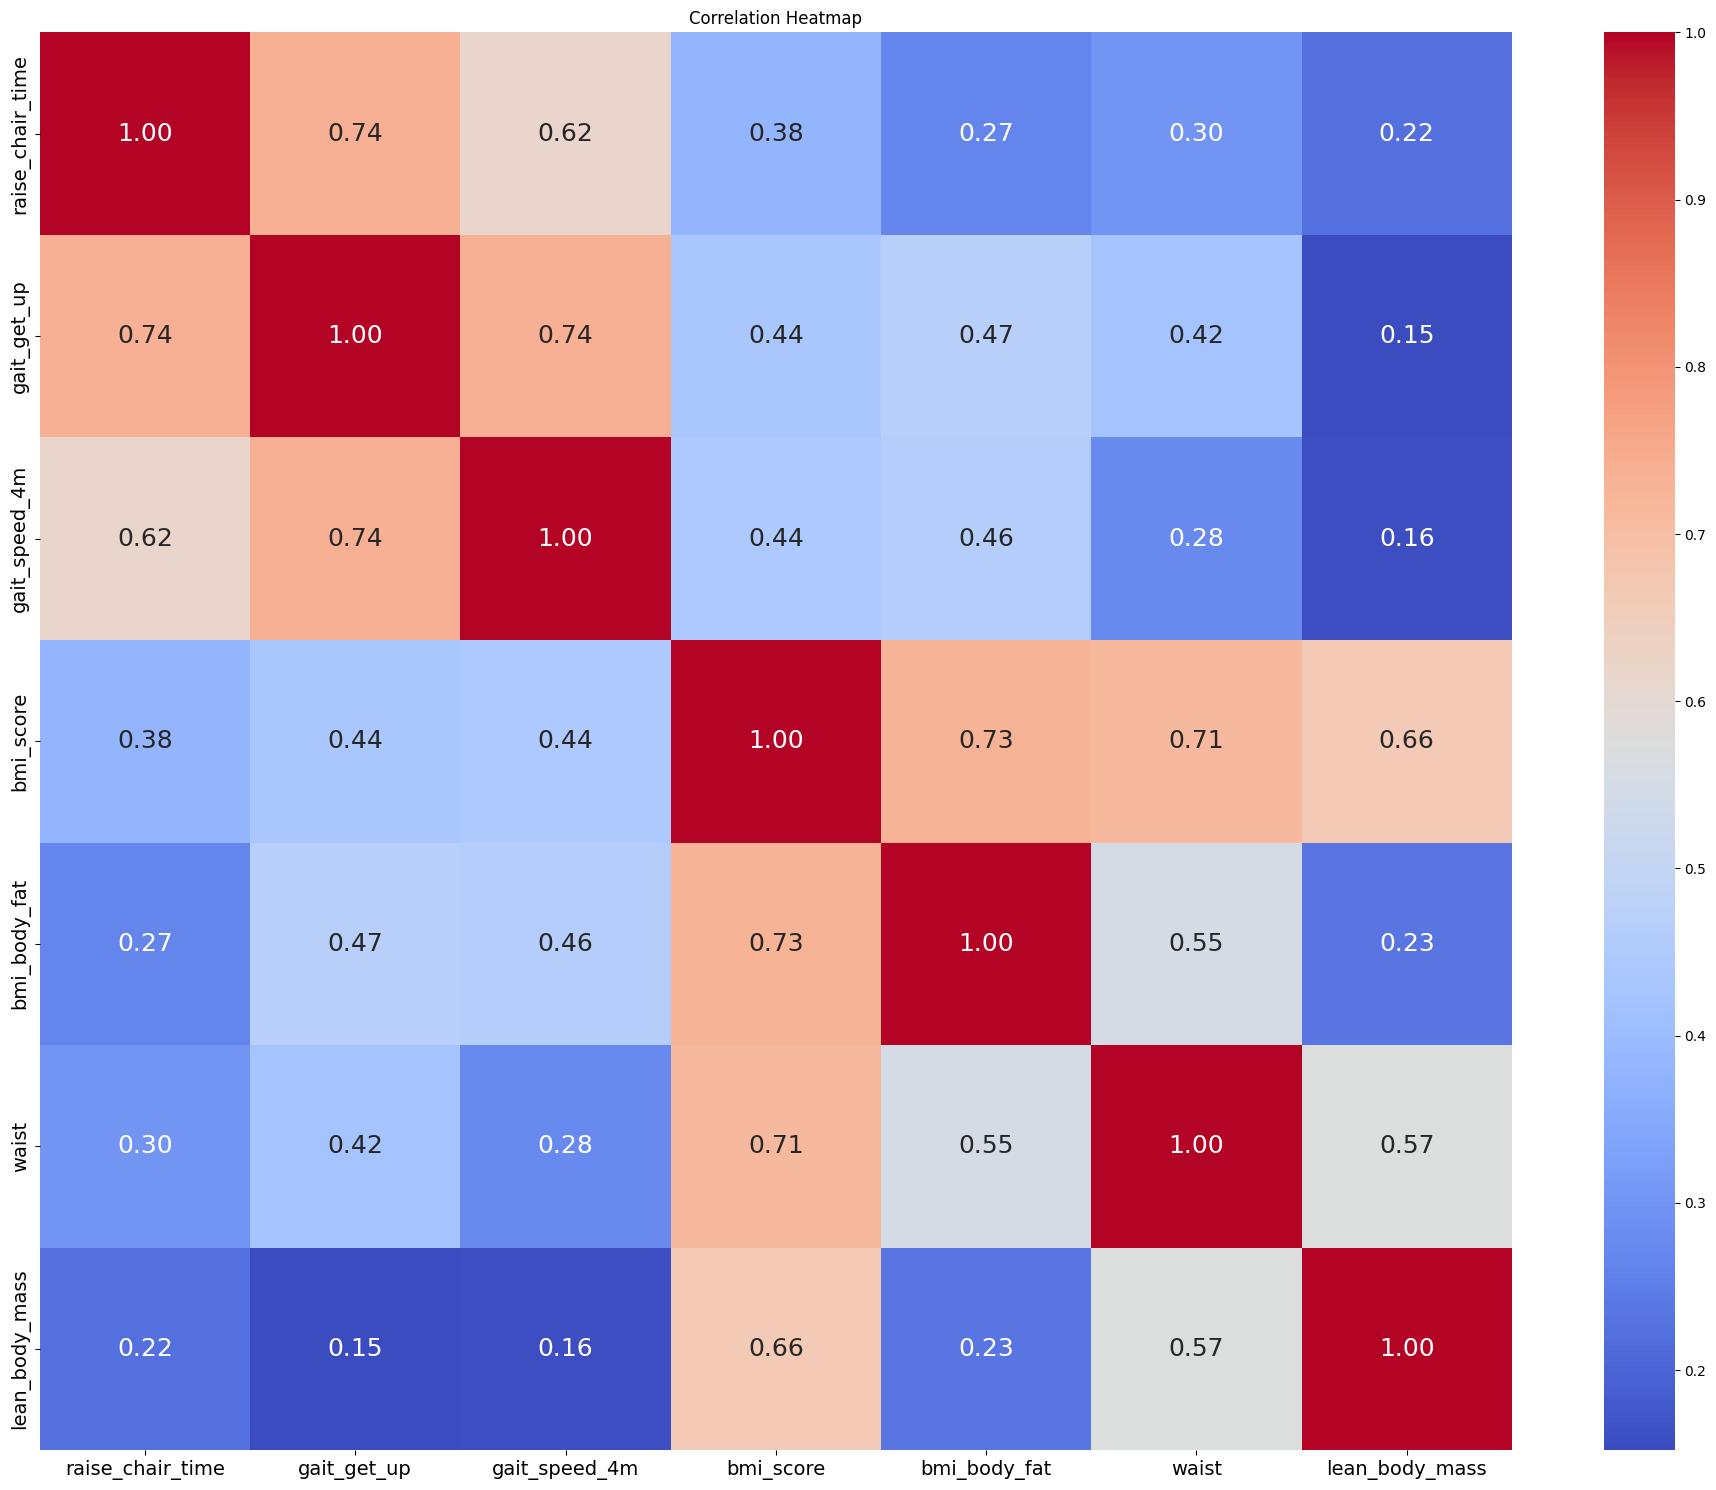

No features found with correlation > 0.95 (excluding self-correlation).


['raise_chair_time',
 'gait_get_up',
 'gait_speed_4m',
 'bmi_score',
 'bmi_body_fat',
 'waist',
 'lean_body_mass']

In [29]:
analyze_numerical(
    dfNEW,
    correlation = 0.95,
    numerical_cols_to_exclude=chosen_columns,
    numerical_features=numerical_featuresNEW
)

Using provided categorical columns: fried, gender, age, comorbidities_most_important, hospitalization_one_year, hospitalization_three_years, ortho_hypotension, vision, audition, weight_loss, exhaustion_score, balance_single, gait_optional_binary, gait_speed_slower, grip_strength_abnormal, low_physical_activity, falls_one_year, fractures_three_years, screening_score, cognitive_total_score, memory_complain, sleep, mmse_total_score, depression_total_score, anxiety_perception, living_alone, leisure_out, leisure_club, social_visits, social_calls, social_phone, social_skype, social_text, house_suitable_participant, house_suitable_professional, stairs_number, life_quality, health_rate, health_rate_comparison, pain_perception, activity_regular, smoking, alcohol_units, katz_index, iadl_grade, comorbidities_count, comorbidities_significant_count, medication_count
The number of categorical columns being analyzed is: 48

Handling missing values in encoded categorical columns (filling with mode)...

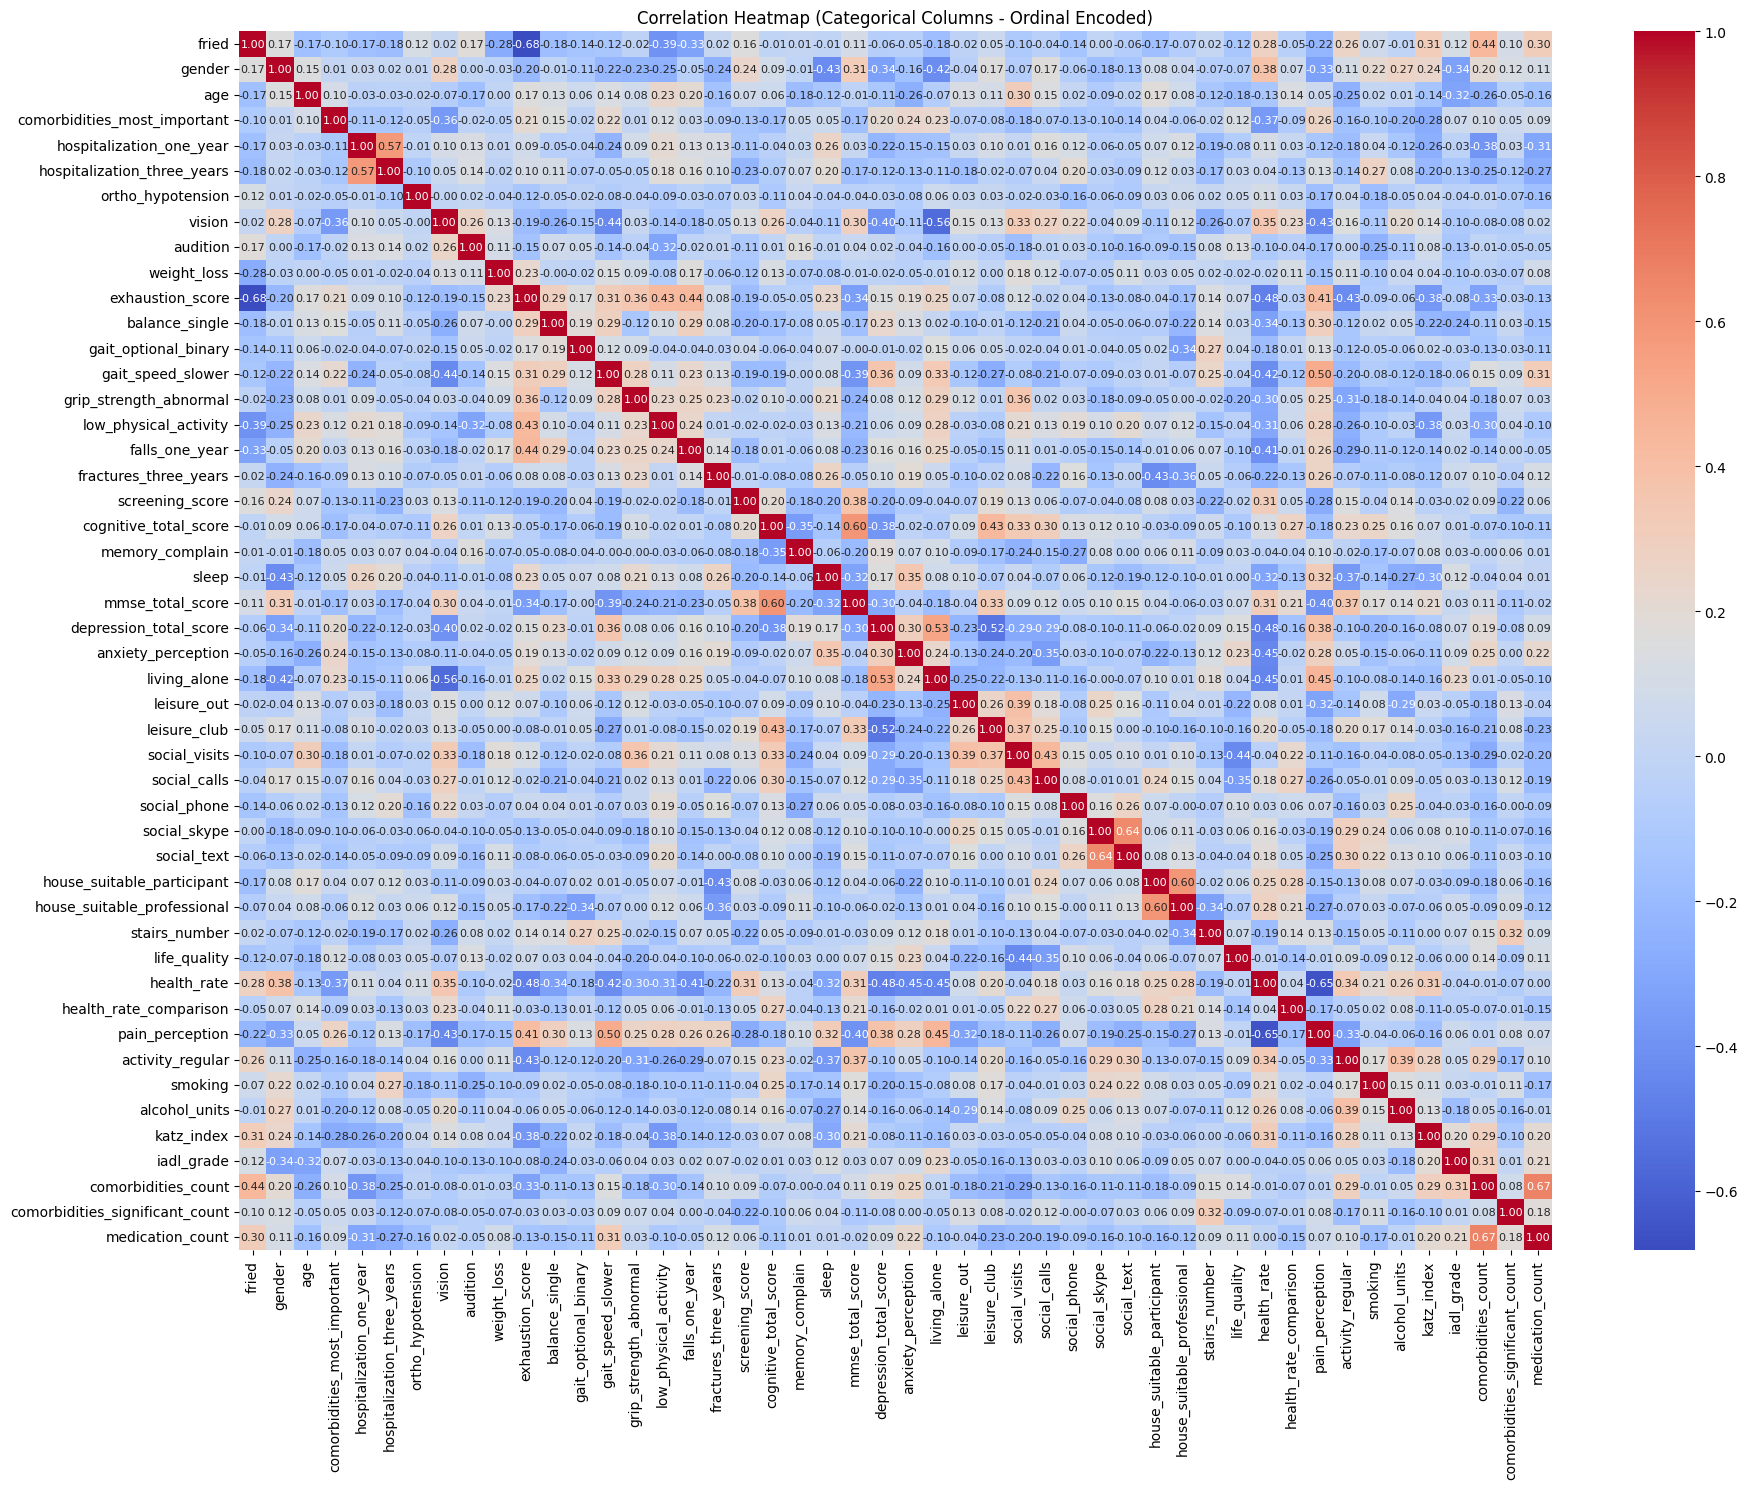


No features found with correlation > 0.95 (excluding self-correlation).

--- Encoded Value Mappings ---

Column: fried
  'Frail' -> 0
  'Non frail' -> 1
  'Pre-frail' -> 2

Column: gender
  'F' -> 0
  'M' -> 1

Column: age
  '70' -> 0
  '71' -> 1
  '72' -> 2
  '73' -> 3
  '74' -> 4
  '75' -> 5
  '76' -> 6
  '77' -> 7
  '78' -> 8
  '79' -> 9
  '80' -> 10
  '81' -> 11
  '82' -> 12
  '83' -> 13
  '84' -> 14
  '85' -> 15

Column: comorbidities_most_important
  'MCI' -> 0
  'Non of the above' -> 1
  'Osteoporosis if woman  /Osteoarthritis if man' -> 2
  'Prior stroke' -> 3

Column: hospitalization_one_year
  '0' -> 0
  '1' -> 1
  '3' -> 2

Column: hospitalization_three_years
  '0' -> 0
  '1' -> 1
  '2' -> 2
  '3' -> 3

Column: ortho_hypotension
  'No' -> 0
  'Yes' -> 1

Column: vision
  'Sees moderately' -> 0
  'Sees poorly' -> 1
  'Sees well' -> 2

Column: audition
  'Hears moderately' -> 0
  'Hears well' -> 1

Column: weight_loss
  'No' -> 0
  'Yes' -> 1

Column: exhaustion_score
  '1' -

In [53]:
analyze_categorical(dfNEW,
                    correlation_threshold=0.95,
                    categorical_cols_to_exclude=chosen_columns
                    ,categorical_features = categorical_featuresNEW
                    )


### 2.6.2. PCA

Using provided numerical columns: raise_chair_time, gait_get_up, gait_speed_4m, bmi_score, bmi_body_fat, waist, lean_body_mass
Number of numerical columns being analyzed: 7


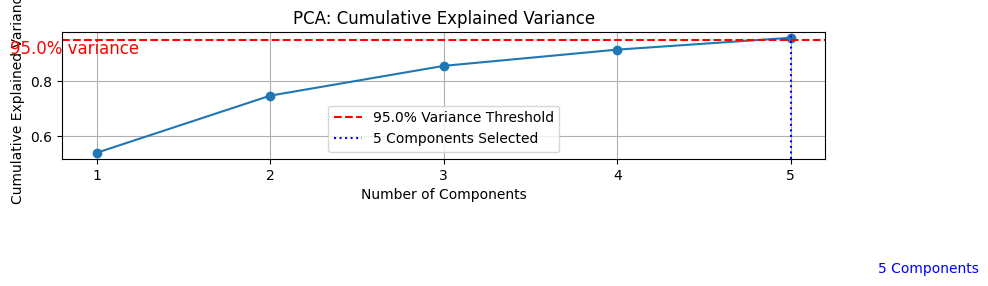

Suggested number of components to keep: 5
Features to keep: ['waist', 'lean_body_mass', 'raise_chair_time', 'bmi_body_fat', 'bmi_score']
Features to drop: ['gait_speed_4m', 'gait_get_up']


In [54]:
# Assuming your DataFrame is 'df'
n_components, explained_variance_ratio, features_to_keep, features_to_drop = analyze_numerical_pca(
    dfNEW,
    #numerical_cols_to_exclude=chosen_columns,
    numerical_features = numerical_featuresNEW,
    variance_threshold=0.95,
    imputation_strategy='mean'
)

# Print the features to keep and drop:
print("Features to keep:", features_to_keep)
print("Features to drop:", features_to_drop)

numerical_featuresKEEP = features_to_keep


# Now you can use features_to_keep and features_to_drop for further analysis:
# reduced_df = df[features_to_keep]
# df = df.drop(columns=features_to_drop)  # To drop the columns from the original DataFrame

Using provided categorical columns: fried, gender, q_date, age, comorbidities_most_important, hospitalization_one_year, hospitalization_three_years, ortho_hypotension, vision, audition, weight_loss, exhaustion_score, balance_single, gait_optional_binary, gait_speed_slower, grip_strength_abnormal, low_physical_activity, falls_one_year, fractures_three_years, screening_score, cognitive_total_score, memory_complain, sleep, mmse_total_score, depression_total_score, anxiety_perception, living_alone, leisure_out, leisure_club, social_visits, social_calls, social_phone, social_skype, social_text, house_suitable_participant, house_suitable_professional, stairs_number, life_quality, health_rate, health_rate_comparison, pain_perception, activity_regular, smoking, alcohol_units, katz_index, iadl_grade, comorbidities_count, comorbidities_significant_count, medication_count
Number of categorical columns being analyzed: 49


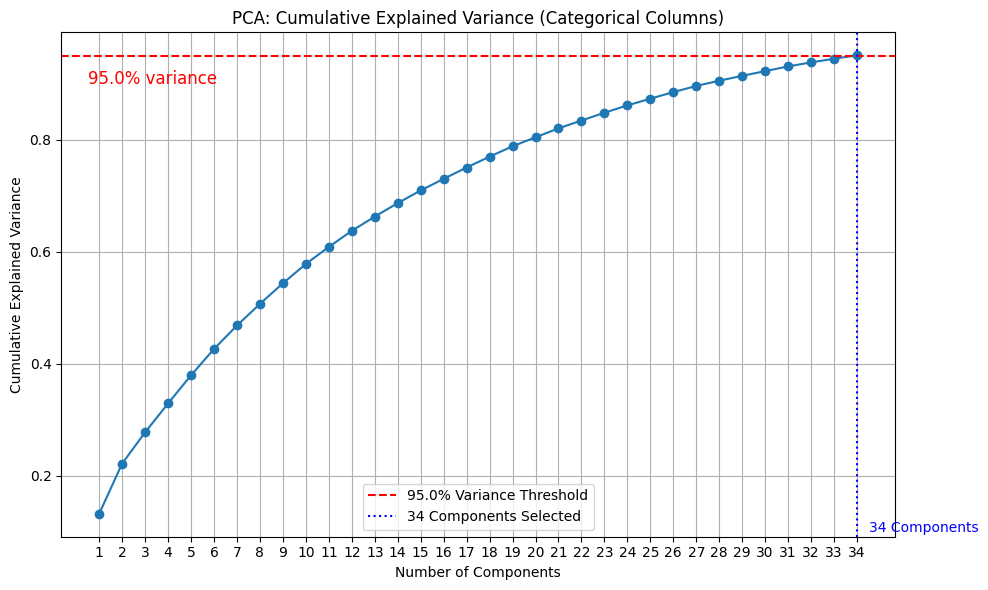

Suggested number of components to keep: 34

--- Encoded Value Mappings ---

Column: fried
  'Frail' -> 0
  'Non frail' -> 1
  'Pre-frail' -> 2

Column: gender
  'F' -> 0
  'M' -> 1

Column: q_date
  '2016-05-23T00:00:00.000Z' -> 0
  '2016-06-23T00:00:00.000Z' -> 1
  '2016-10-05T22:52:28.000Z' -> 2
  '2016-10-06T00:00:00.000Z' -> 3
  '2016-10-10T15:04:04.000Z' -> 4
  '2016-10-12T10:34:24.000Z' -> 5
  '2016-10-14T23:05:19.000Z' -> 6
  '2016-10-16T10:19:26.000Z' -> 7
  '2016-10-17T00:00:00.000Z' -> 8
  '2016-10-18T00:00:00.000Z' -> 9
  '2016-10-19T00:00:00.000Z' -> 10
  '2016-10-21T00:00:00.000Z' -> 11
  '2016-10-24T21:41:00.000Z' -> 12
  '2016-10-27T12:19:35.000Z' -> 13
  '2016-10-27T14:41:39.000Z' -> 14
  '2016-10-31T07:12:27.000Z' -> 15
  '2016-11-02T10:51:06.000Z' -> 16
  '2016-11-02T11:19:09.000Z' -> 17
  '2016-11-03T09:57:00.000Z' -> 18
  '2016-11-07T00:00:00.000Z' -> 19
  '2016-11-09T21:13:37.000Z' -> 20
  '2016-11-19T22:11:14.000Z' -> 21
  '2016-11-23T00:00:00.000Z' -> 22
  '2016-

In [55]:
# Assuming your DataFrame is 'df'
n_components, explained_variance_ratio, features_to_keep, features_to_drop, encoded_values_mapping = analyze_categorical_pca(
    dfNEW,
    #categorical_cols_to_exclude=chosen_columns,  # Exclude columns as needed
    categorical_features = categorical_featuresNEW,
    variance_threshold=0.95,
    imputation_strategy='most_frequent'
)

# Print the features to keep and drop:
print("Features to keep:", features_to_keep)
print("Features to drop:", features_to_drop)

categorical_featuresKEEP = features_to_keep
# Now you can use the results, including the encoding mapping:
# reduced_df = df[features_to_keep]
# ... (other analysis using the encoding mapping)

## 2.7. Reduce dimensionality

### 2.7.1. Apply

In [56]:
numerical_featuresKEEP = ['bmi_score', 'gait_get_up', 'bmi_body_fat', 'raise_chair_time', 'waist', 'time_delta_days']

In [57]:
dfFinal = reduce_dimensionality(dfNEW,numerical_featuresKEEP,categorical_featuresKEEP,primary_key_cols) #,chosen_class_columns

Reducing dimensionality. Keeping 35 columns from the original DataFrame (58 columns):
  Columns to be included: part_id, clinical_visit, bmi_score, gait_get_up, bmi_body_fat, raise_chair_time, waist, leisure_out, balance_single, stairs_number, gender, sleep, house_suitable_professional, alcohol_units, comorbidities_most_important, memory_complain, house_suitable_participant, social_calls, comorbidities_significant_count, depression_total_score, weight_loss, gait_optional_binary, hospitalization_three_years, iadl_grade, living_alone, life_quality, age, social_phone, health_rate, q_date, comorbidities_count, low_physical_activity, health_rate_comparison, social_text, ortho_hypotension


In [58]:
print(dfFinal.to_string( ))

     part_id  clinical_visit  bmi_score  gait_get_up  bmi_body_fat  raise_chair_time       waist  leisure_out       balance_single  stairs_number gender                     sleep house_suitable_professional  alcohol_units                   comorbidities_most_important memory_complain house_suitable_participant  social_calls  comorbidities_significant_count  depression_total_score weight_loss  gait_optional_binary  hospitalization_three_years  iadl_grade living_alone  life_quality  age  social_phone    health_rate                    q_date  comorbidities_count low_physical_activity health_rate_comparison  social_text ortho_hypotension
0       1084               1  24.095500         9.05     22.800000             14.00   89.000000            7               >5 sec           17.0      M          No sleep problem                         Yes            1.5                               Non of the above              No                        Yes             7                                2

In [59]:
#describe_dataframe_custom_out(dfSimpleInput, exclude_columns=primary_key_cols)

# Assuming 'df' is your DataFrame
summary_dictdfFinal = describe_dataframe_custom_out(dfFinal, exclude_columns = primary_key_cols ##+ chosen_columns
                                             , zscore_threshold = 5.0, iqr_multiplier = 1.5
                                             ,categorical_threshold_unique = 20, max_unique_ratio_for_categorical = 0.2
                                             , force_categorical_columns = ['anxiety_perception', 'social_phone', 'life_quality', 'pain_perception'])
# exclude_columns = None, zscore_threshold = 3.0, iqr_multiplier = 1.5,categorical_threshold_unique = 5, max_unique_ratio_for_categorical = 0.1

print("Numerical Summary:")
display(summary_dictdfFinal['numerical_summary'])

print("\nCategorical Summary:")
display(summary_dictdfFinal['categorical_summary'])

numerical_featuresFinal = summary_dictdfFinal['numerical_features']
categorical_featuresFinal = summary_dictdfFinal['categorical_features']

display(numerical_featuresFinal)
display(categorical_featuresFinal)

Accepting default classifications. No interactive reclassification will occur.
Numerical Summary:


,Column Name,Data Type,Missing Values,Missing %,Min Value,Max Value,Mean,Median,Mode(s),Z-Score Outliers,IQR Outliers
0,bmi_score,float64,0,0.0%,22.479339,44.658044,28.664850,27.168115,35.430839,0,9
1,gait_get_up,float64,0,0.0%,4.000000,34.700000,10.438462,9.050000,"6.0, 9.0",0,7
2,bmi_body_fat,float64,0,0.0%,19.700000,37.200000,27.653424,27.962651,22.9,0,0
3,raise_chair_time,float64,0,0.0%,6.900000,999.000000,45.400684,11.700000,14.0,4,5
4,waist,float64,0,0.0%,82.000000,134.000000,100.065527,97.000000,95.0,0,4



Categorical Summary:


,Column Name,Data Type,Missing Values,Missing %,Unique Values,Mode(s)
0,leisure_out,int64,0,0.0%,11,7
1,balance_single,object,0,0.0%,3,>5 sec
2,stairs_number,float64,0,0.0%,7,0.0
3,gender,object,0,0.0%,2,M
4,sleep,object,0,0.0%,3,No sleep problem
5,house_suitable_professional,object,0,0.0%,2,Yes
6,alcohol_units,float64,0,0.0%,15,0.0
7,comorbidities_most_important,object,0,0.0%,4,Non of the above
8,memory_complain,object,0,0.0%,2,No
9,house_suitable_participant,object,0,0.0%,2,Yes


['bmi_score', 'gait_get_up', 'bmi_body_fat', 'raise_chair_time', 'waist']

['leisure_out',
 'balance_single',
 'stairs_number',
 'gender',
 'sleep',
 'house_suitable_professional',
 'alcohol_units',
 'comorbidities_most_important',
 'memory_complain',
 'house_suitable_participant',
 'social_calls',
 'comorbidities_significant_count',
 'depression_total_score',
 'weight_loss',
 'gait_optional_binary',
 'hospitalization_three_years',
 'iadl_grade',
 'living_alone',
 'life_quality',
 'age',
 'social_phone',
 'health_rate',
 'q_date',
 'comorbidities_count',
 'low_physical_activity',
 'health_rate_comparison',
 'social_text',
 'ortho_hypotension']

### 2.7.2. Correlations

The number of numerical columns being analyzed is: 5


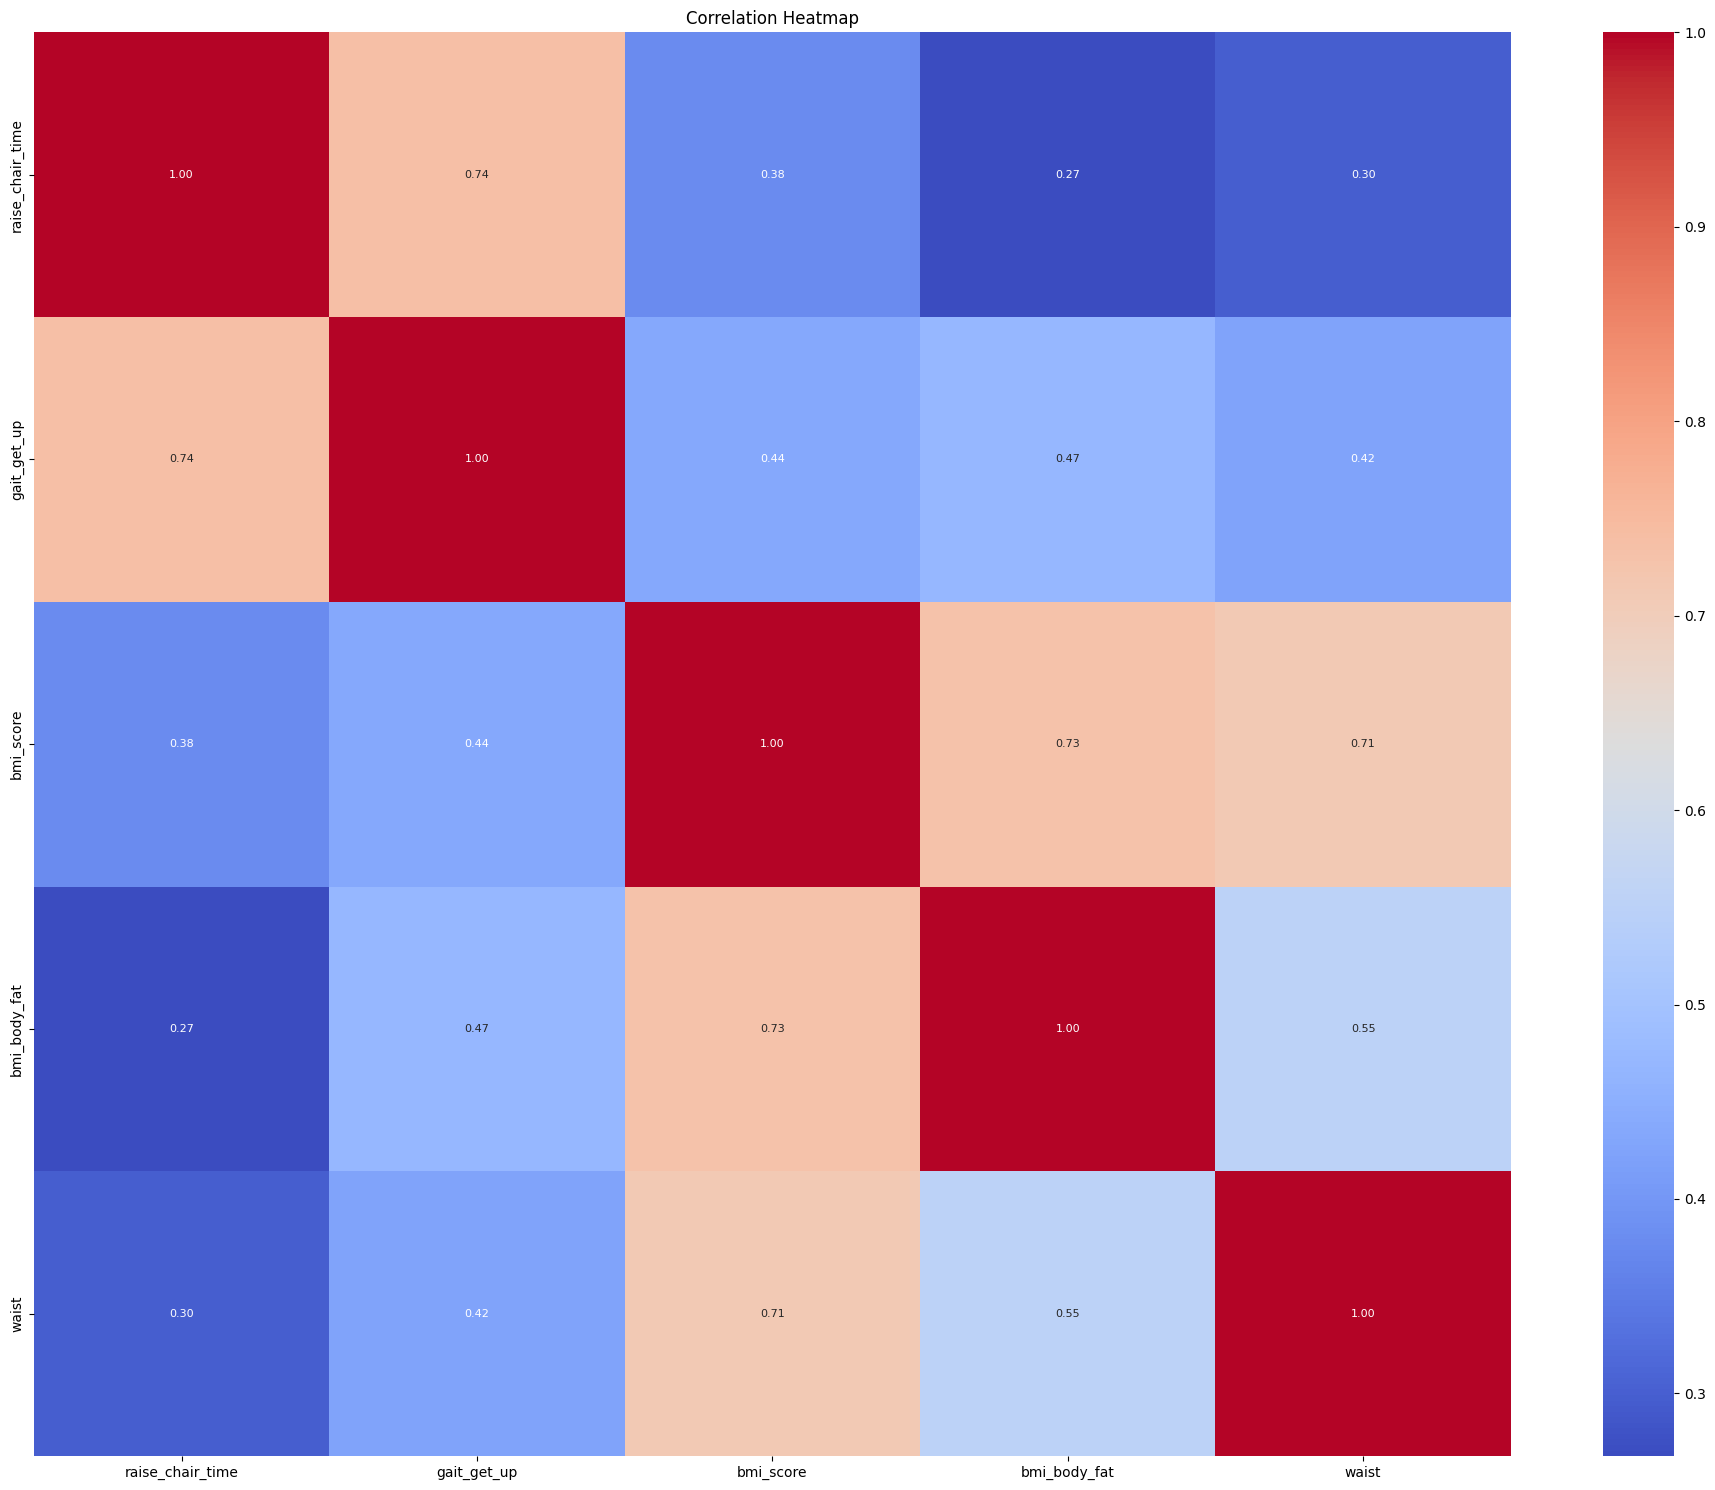

No features found with correlation > 0.95 (excluding self-correlation).


['raise_chair_time', 'gait_get_up', 'bmi_score', 'bmi_body_fat', 'waist']

In [60]:
analyze_numerical(
    dfFinal,
    correlation = 0.95,
    numerical_cols_to_exclude=chosen_columns,
    numerical_features=numerical_featuresNEW
)

Using provided categorical columns: gender, age, comorbidities_most_important, hospitalization_three_years, ortho_hypotension, weight_loss, balance_single, gait_optional_binary, low_physical_activity, memory_complain, sleep, depression_total_score, living_alone, leisure_out, social_calls, social_phone, social_text, house_suitable_participant, house_suitable_professional, stairs_number, life_quality, health_rate, health_rate_comparison, alcohol_units, iadl_grade, comorbidities_count, comorbidities_significant_count
The number of categorical columns being analyzed is: 27

Handling missing values in encoded categorical columns (filling with mode)...


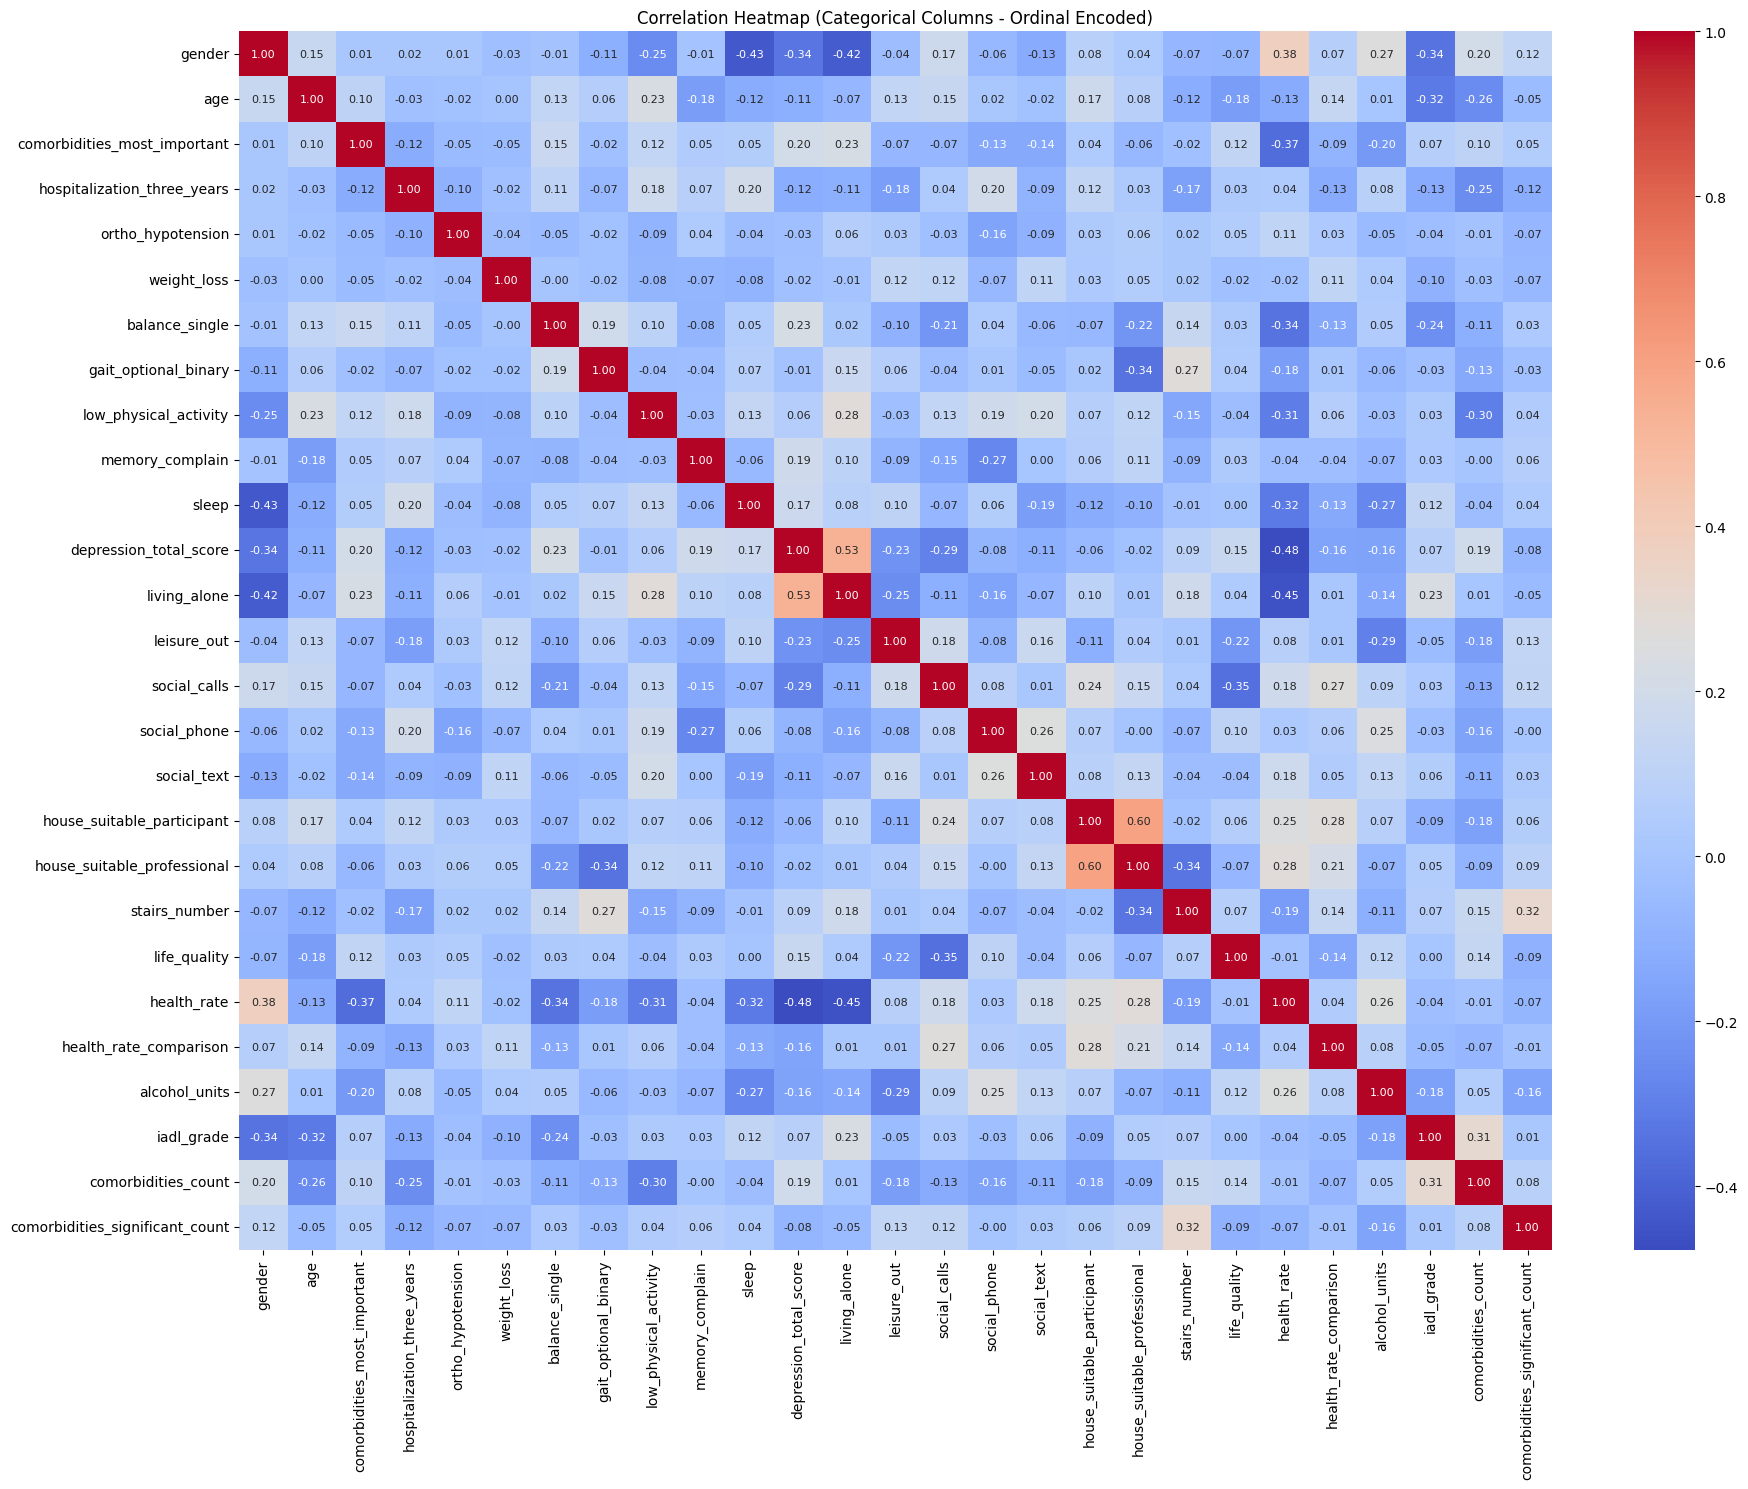


No features found with correlation > 0.95 (excluding self-correlation).

--- Encoded Value Mappings ---

Column: gender
  'F' -> 0
  'M' -> 1

Column: age
  '70' -> 0
  '71' -> 1
  '72' -> 2
  '73' -> 3
  '74' -> 4
  '75' -> 5
  '76' -> 6
  '77' -> 7
  '78' -> 8
  '79' -> 9
  '80' -> 10
  '81' -> 11
  '82' -> 12
  '83' -> 13
  '84' -> 14
  '85' -> 15

Column: comorbidities_most_important
  'MCI' -> 0
  'Non of the above' -> 1
  'Osteoporosis if woman  /Osteoarthritis if man' -> 2
  'Prior stroke' -> 3

Column: hospitalization_three_years
  '0' -> 0
  '1' -> 1
  '2' -> 2
  '3' -> 3

Column: ortho_hypotension
  'No' -> 0
  'Yes' -> 1

Column: weight_loss
  'No' -> 0
  'Yes' -> 1

Column: balance_single
  '<5 sec' -> 0
  '>5 sec' -> 1
  'test non realizable' -> 2

Column: gait_optional_binary
  'False' -> 0
  'True' -> 1

Column: low_physical_activity
  'No' -> 0
  'Yes' -> 1

Column: memory_complain
  'No' -> 0
  'Yes' -> 1

Column: sleep
  'No sleep problem' -> 0
  'Occasional sleep pr

In [61]:
analyze_categorical(dfFinal,
                    correlation_threshold=0.95,
                    categorical_cols_to_exclude=chosen_columns
                    ,categorical_features = categorical_featuresNEW
                    )


### 2.7.3. Export file

In [64]:
dfFinal.to_csv("VirtualPatientModels_dfFinal_qDate.csv", index=False)

In [63]:

print("Real Data Health Rate Distribution:")
print(dfFinal['health_rate'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
print("Real Data Health Counts:")
print(dfFinal['health_rate'].value_counts())

Real Data Health Rate Distribution:
health_rate
4 - Good         60.68%
3 - Medium        26.5%
2 - Bad           5.13%
5 - Excellent     4.27%
1 - Very bad      3.42%
Name: proportion, dtype: object
Real Data Health Counts:
health_rate
4 - Good         71
3 - Medium       31
2 - Bad           6
5 - Excellent     5
1 - Very bad      4
Name: count, dtype: int64
